# State/UT wise analysis.

# Note :this phase is whole state/ut wise analysis (not district-wise).

2.1	Analysis of Literacy Rate vs Total Crimes.

2.2	 Analysis of the type of crime vs each state vs Literacy rate.

2.3	Analysis of year-on-year total crime rate.

2.4	 Analysis of area vs overall crime.

2.5	 Analysis of Population vs overall Crime.

2.6	Each state crime report. There is no fixed format to write a report, 
you can write a report inside the notebook itself based on what you have analyzed in the above points.

In [1]:
import warnings
warnings.simplefilter("ignore")
import missingno as ms   #for missing values visualization
import joblib

import pandas as pd
import numpy as np
import seaborn as sns    #for creating heatmap, time series plot, violin plots &so on
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

import scipy
import sklearn
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv("Cumulative Dataset of Crimes in india.csv")
df

STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
0       ANDHRA PRADESH  2001    76210007          60.47            275045   
1    ARUNACHAL PRADESH  2001     1097968          54.34             83743   
2                ASSAM  2001    26655528          63.25             78438   
3                BIHAR  2001    82998509          47.00             94163   
4         CHHATTISGARH  2001    20733232          64.66            135191   
..                 ...   ...         ...            ...               ...   
403         CHANDIGARH  2012     1144839          86.05               114   
404       D & N HAVELI  2012      259148            NaN               491   
405        DAMAN & DIU  2012      191924            NaN               112   
406        LAKSHADWEEP  2012       74578            NaN                32   
407         PUDUCHERRY  2012     1148900            NaN               479   

     MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0      2602               1555                                        136   
1        83                 53                                          3   
2      1356                481                                         40   
3      3643               3419                                        250   
4       880                529                                         45   
..      ...                ...                                        ...   
403      21                 44                                          5   
404       7                  2                                          0   
405       3                  5                                          0   
406       0                  0                                          0   
407      29                 27                                         12   

     RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0     871               0         871                    1182   
1      33               0          33                      83   
2     817               0         817                    1480   
3     888               0         888                    2159   
4     959               0         959                     207   
..    ...             ...         ...                     ...   
403    27               0          27                      87   
404     3               0           3                      13   
405     5               0           5                       3   
406     0               0           0                       0   
407    13               0          13                      19   

     KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                            765   
1                                             55   
2                                           1070   
3                                            518   
4                                            171   
..                                           ...   
403                                           66   
404                                            9   
405                                            0   
406                                            0   
407                                           16   

     KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                   417      214   
1                                    28       22   
2                                   410      532   
3                                  1641     1291   
4                                    36       87   
..                                  ...      ...   
403                                  21        3   
404                                   4        2   
405                                   3        1   
406                                   0        0   
407                                   3        5   

     PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
0                                       9      629      7220  

Here we can see that there is 408 Rows and 48 columns which is keyfactor for our Analysis

In [3]:
df.columns

Index(['STATE/UT', 'YEAR', 'POPULATION', 'LITERACY RATE', 'AREA (in sq. km)',
       'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'CRIMES AGAINST SC', 'CRIMES AGAINST ST', 'Crimes Against Women',
       'CRIMES AGAINST CHILDREN', 'JUVENILES APPREHENDED',
       'POL

In [4]:
#iformation about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             408 non-null    object 
 1   YEAR                                                 408 non-null    int64  
 2   POPULATION                                           408 non-null    int64  
 3   LITERACY RATE                                        375 non-null    float64
 4   AREA (in sq. km)                                     408 non-null    int64  
 5   MURDER                                               408 non-null    int64  
 6   ATTEMPT TO MURDER                                    408 non-null    int64  
 7   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            408 non-null    int64  
 8   RAPE                                                 408 non-null    i

As we can see there are some null values present in "LITERACY RATE" ,  "JUVENILES APPREHENDED" and "POLICEMEN KILLED ON DUTY". As we dont want to lose any data so we will fill the missing values with mean values.

### Treating Null values in the dataset

In [5]:
df['LITERACY RATE']=df['LITERACY RATE'].fillna(df['LITERACY RATE'].mean())
df['JUVENILES APPREHENDED']=df['JUVENILES APPREHENDED'].fillna(df['JUVENILES APPREHENDED'].mean())
df['POLICEMEN KILLED ON DUTY']=df['POLICEMEN KILLED ON DUTY'].fillna(df['POLICEMEN KILLED ON DUTY'].mean())

In [6]:
df.isna().sum()

STATE/UT                                               0
YEAR                                                   0
POPULATION                                             0
LITERACY RATE                                          0
AREA (in sq. km)                                       0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                       

There are no null values present so we can continue with this data now

In [7]:
df.duplicated().sum()

0

We can see that there no duplicated values present in our dataset

In [8]:
df.describe()

YEAR    POPULATION  LITERACY RATE  AREA (in sq. km)  \
count   408.000000  4.080000e+02     408.000000        408.000000   
mean   2006.500000  3.257161e+07      74.954053      96493.600490   
std       3.456291  4.130209e+07       8.804349     102653.236064   
min    2001.000000  6.065000e+04      47.000000         32.000000   
25%    2003.750000  1.224418e+06      69.115000      10486.000000   
50%    2006.500000  1.622985e+07      74.954053      54619.500000   
75%    2009.250000  5.740046e+07      81.640000     155707.000000   
max    2012.000000  2.058880e+08      98.180000     342239.000000   

            MURDER  ATTEMPT TO MURDER  \
count   408.000000         408.000000   
mean    971.416667         849.754902   
std    1229.031743        1164.326125   
min       0.000000           0.000000   
25%      45.000000          29.750000   
50%     381.000000         432.500000   
75%    1479.750000        1407.500000   
max    7601.000000        7964.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                 408.000000   408.000000      408.000000   
mean                                  107.183824   570.375000        0.063725   
std                                   257.514272   704.930637        0.397607   
min                                     0.000000     0.000000        0.000000   
25%                                     4.000000    26.750000        0.000000   
50%                                    28.000000   281.500000        0.000000   
75%                                    94.000000   961.500000        0.000000   
max                                  1616.000000  3425.000000        5.000000   

        OTHER RAPE  KIDNAPPING & ABDUCTION  \
count   408.000000              408.000000   
mean    570.311275              813.171569   
std     704.883153             1204.731087   
min       0.000000                0.000000   
25%      26.750000               32.750000   
50%     281.500000              267.000000   
75%     961.500000             1081.000000   
max    3425.000000             8878.000000   

       KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
count                                   408.000000   
mean                                    608.473039   
std                                     970.140758   
min                                       0.000000   
25%                                      14.000000   
50%                                     196.500000   
75%                                     828.750000   
max                                    7910.000000   

       KIDNAPPING AND ABDUCTION OF OTHERS      DACOITY  \
count                          408.000000   408.000000   
mean                           204.698529   144.676471   
std                            320.658222   225.185369   
min                              0.000000     0.000000   
25%                             11.000000     4.000000   
50%                             77.500000    42.000000   
75%                            257.250000   199.000000   
max                           2416.000000  1319.000000   

       PREPARATION AND ASSEMBLY FOR DACOITY      ROBBERY      BURGLARY  \
count                            408.000000   408.000000    408.000000   
mean                              75.245098   592.661765   2680.843137   
std                              171.749872   843.696965   3535.502612   
min                                0.000000     0.000000      0.000000   
25%                                0.000000    18.750000    158.500000   
50%                                6.000000   162.500000   1105.500000   
75%                               78.250000   783.500000   4110.500000   
max                             1263.000000  6949.000000  16617.000000   

              THEFT    AUTO THEFT   OTHER THEFT         RIOTS  \
count    408.000000    408.000000    408.000000    408.000000   
mean    8012.215686   2802.335784   5209.879902   1896.889706   
std  

### From the above details we can notice the following-

-Range,Mean and Standard deviation of each column

-Each quartile for every column

# 2.1 Analysis of Literacy Rate vs Total Crimes.

Text(0, 0.5, 'Total Crimes')

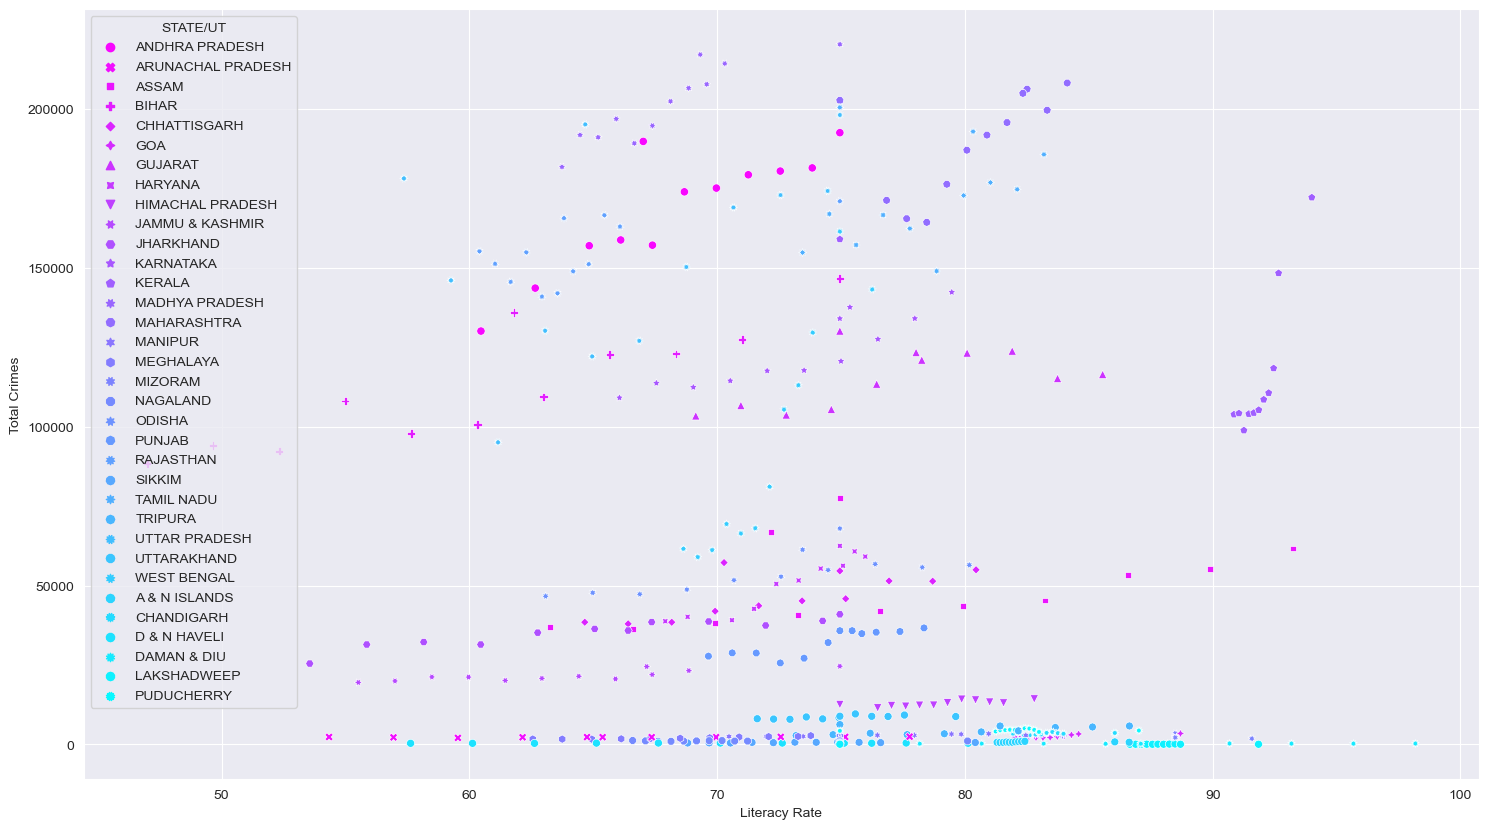

In [9]:
plt.figure(figsize=(18,10))
sns.set_style('darkgrid')
sns.scatterplot(x=df['LITERACY RATE'],y=df['TOTAL IPC CRIMES'],hue=df['STATE/UT'],style=df['STATE/UT'],palette='cool_r')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')

#map_state={['A& N ISLANDS', 'LAKSHADWEEP']:"Islands",['HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'PUNJAB', 'RAJASTHAN', 'UTTAR PRADESH', 'UTTARAKHAND', 'DELHI','CHANDIGARH']:"North",
        ['MADHYA PRADESH', 'CHATTISGARH']:'central',
        ['GOA', 'GUJARAT', 'MAHARASHTRA', 'D & N HAVELI', 'DAMAN & DIU']:"West",
        ['ANDHRA PRADESH', 'KARNATAKA','KERELA', 'TAMIL NADU','PUDUCHERRY']:"South",
        ['ARUNACHAL PRADESH', 'ASSAM', 'NAGALAND', 'SIKKIM', 'MIZORAM', 'MEGHALAYA', 'TRIPURA', 'MANIPUR']:"Northeast",
        ['BIHAR', 'JHARKHAND', 'ODISHA', 'WEST BENGAL']:"East"}


In [10]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [11]:
map_state = {
    'A & N ISLANDS':"Islands",
    'LAKSHADWEEP': "Islands",
    'MADHYA PRADESH':'Central',
    'CHHATTISGARH': 'Central',
    ('BIHAR'): "East",
    ('JHARKHAND'): "East",
    ('ODISHA'): "East",
    ('WEST BENGAL'): "East",
    ('GOA'): "West",
    ('GUJARAT'): "West",
    ('MAHARASHTRA'): "West",
    ('D & N HAVELI'): "West",
    ('DAMAN & DIU'): "West",
    ('ANDHRA PRADESH'): "South",
    ('KARNATAKA'): "South",
    ('KERALA'): "South",
    ('TAMIL NADU'): "South",
    ('PUDUCHERRY'): "South",
    ('ARUNACHAL PRADESH'): "Northeast",
    ('ASSAM'): "Northeast",
    ('NAGALAND'): "Northeast",
    ('SIKKIM'): "Northeast",
    ('MIZORAM'): "Northeast",
    ('MEGHALAYA'): "Northeast",
    ('TRIPURA'): "Northeast",
    ('MANIPUR'): "Northeast",
    ('HARYANA'): "North",
    ('HIMACHAL PRADESH'): "North",
    ('JAMMU & KASHMIR'): "North",
    ('PUNJAB'): "North",
    ('RAJASTHAN'): "North",
    ('UTTAR PRADESH'): "North",
    ('UTTARAKHAND'): "North",
    ('CHANDIGARH'): "North"    
}

df['Region'] = df['STATE/UT'].map(map_state)
df


STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
0       ANDHRA PRADESH  2001    76210007      60.470000            275045   
1    ARUNACHAL PRADESH  2001     1097968      54.340000             83743   
2                ASSAM  2001    26655528      63.250000             78438   
3                BIHAR  2001    82998509      47.000000             94163   
4         CHHATTISGARH  2001    20733232      64.660000            135191   
..                 ...   ...         ...            ...               ...   
403         CHANDIGARH  2012     1144839      86.050000               114   
404       D & N HAVELI  2012      259148      74.954053               491   
405        DAMAN & DIU  2012      191924      74.954053               112   
406        LAKSHADWEEP  2012       74578      74.954053                32   
407         PUDUCHERRY  2012     1148900      74.954053               479   

     MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0      2602               1555                                        136   
1        83                 53                                          3   
2      1356                481                                         40   
3      3643               3419                                        250   
4       880                529                                         45   
..      ...                ...                                        ...   
403      21                 44                                          5   
404       7                  2                                          0   
405       3                  5                                          0   
406       0                  0                                          0   
407      29                 27                                         12   

     RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0     871               0         871                    1182   
1      33               0          33                      83   
2     817               0         817                    1480   
3     888               0         888                    2159   
4     959               0         959                     207   
..    ...             ...         ...                     ...   
403    27               0          27                      87   
404     3               0           3                      13   
405     5               0           5                       3   
406     0               0           0                       0   
407    13               0          13                      19   

     KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                            765   
1                                             55   
2                                           1070   
3                                            518   
4                                            171   
..                                           ...   
403                                           66   
404                                            9   
405                                            0   
406                                            0   
407                                           16   

     KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                   417      214   
1                                    28       22   
2                                   410      532   
3                                  1641     1291   
4                                    36       87   
..                                  ...      ...   
403                                  21        3   
404                                   4        2   
405                                   3        1   
406                                   0        0   
407                                   3        5   

     PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
0                                       9      629      7220  

In [12]:
df.isnull().sum()

STATE/UT                                               0
YEAR                                                   0
POPULATION                                             0
LITERACY RATE                                          0
AREA (in sq. km)                                       0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                       

In [13]:
Islands=['A& N ISLANDS', 'LAKSHADWEEP']
North=['HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'PUNJAB', 'RAJASTHAN', 'UTTAR PRADESH', 'UTTARAKHAND', 'DELHI','CHANDIGARH']
Central=['MADHYA PRADESH', 'CHATTISGARH']
West=['GOA', 'GUJARAT', 'MAHARASHTRA', 'D & N HAVELI', 'DAMAN & DIU']
South=['ANDHRA PRADESH', 'KARNATAKA','KERELA', 'TAMIL NADU','PUDUCHERRY']
Northeast=['ARUNACHAL PRADESH', 'ASSAM', 'NAGALAND', 'SIKKIM', 'MIZORAM', 'MEGHALAYA', 'TRIPURA', 'MANIPUR']
East=['BIHAR', 'JHARKHAND', 'ODISHA', 'WEST BENGAL']

Text(0, 0.5, 'Total Crimes')

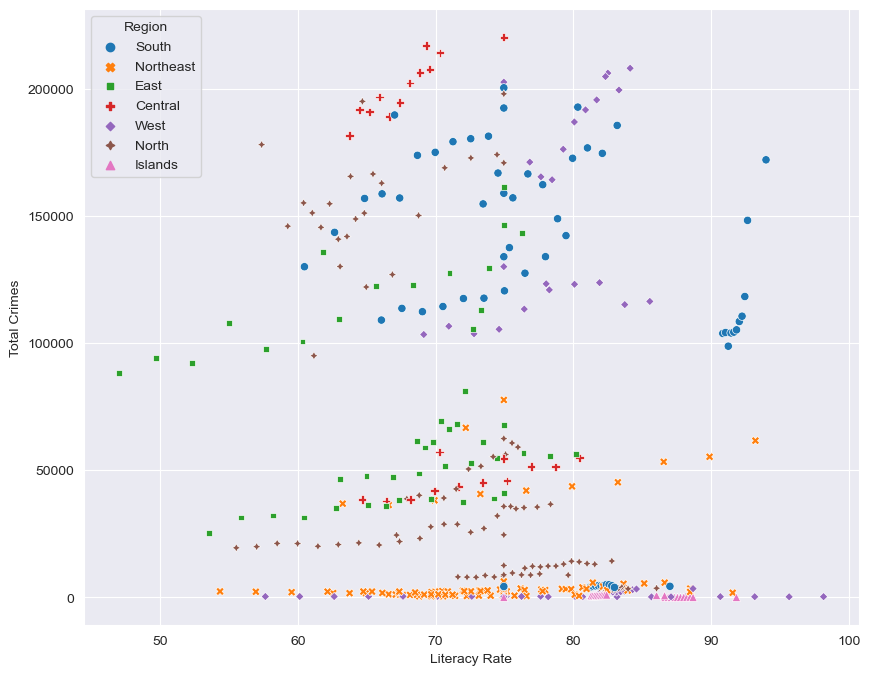

In [14]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.scatterplot(x=df['LITERACY RATE'],y=df['TOTAL IPC CRIMES'],hue=df['Region'],style=df['Region'],palette='tab10')
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')

From above we notice that literacy rate is highest in Northeast and islands region and the total crimes are highes in west,South, central and the North region. 

And we can clearly see as the literacy rate rises total crimes decline which shows indirect relation between the two even though there are some cases of high literacy rates accompanied with high total crimes as seen in central and southern region.

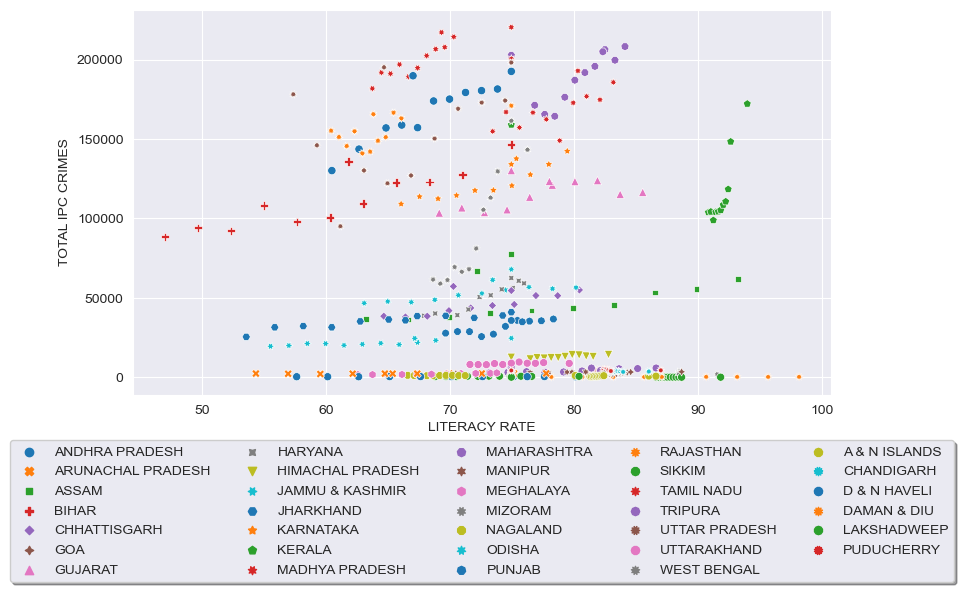

In [15]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=df['LITERACY RATE'],y=df['TOTAL IPC CRIMES'],hue=df['STATE/UT'],style=df['STATE/UT'],palette='tab10')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

#### From above we see that Lakshadweep, Mizoram, Kerela and Delhi are amongst the most literate states as we can confirm from the region graph.But as we can see Delhi is also one of those with the highest total crime rates tied with Maharashtra. But if we just look at the total number of crimes, Uttar Pradesh and Andhra Pradesh are the states with highest number.

So in conclusion we see that total crimes definitely decreases as the literacy rate rises with some exceptions of urban and metropolitan states like Kerela, Delhi and Maharashtra

# 2.2) Analysis of the type of crime vs each state vs Literacy rate.

For this we will be plotting each type of crime on y axis and literacy rate on x axis with states as hue.

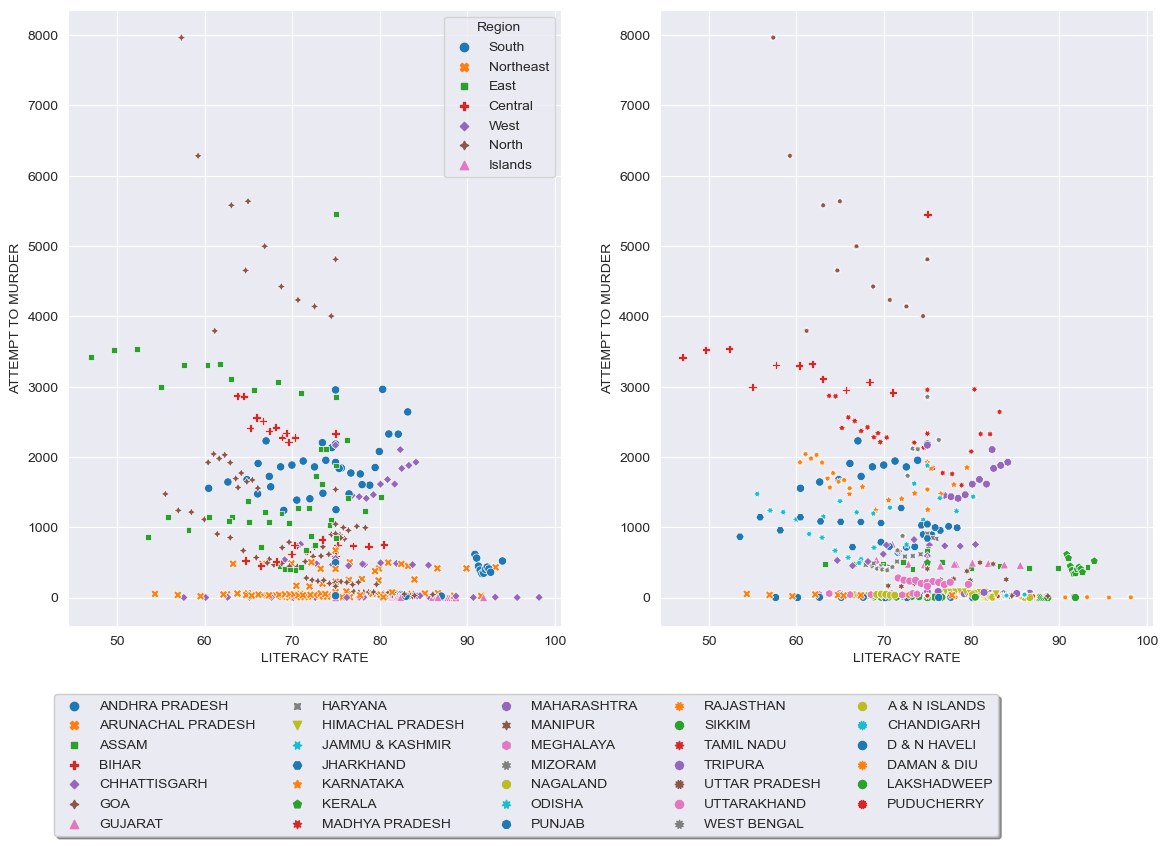

In [16]:
fig,axes = plt.subplots(1,2, figsize=(14,8))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='ATTEMPT TO MURDER',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='ATTEMPT TO MURDER',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From above graphs we notice that northern region has the highest attempts to murder with states- Uttar pradesh being the highest state with Bihar coming on second. While Lakshadweep, Arunachal Pradesh and most of the states from norteast region and some from the southern region have very low attempt to murders

## Literacy rate vs Murder vs Each State

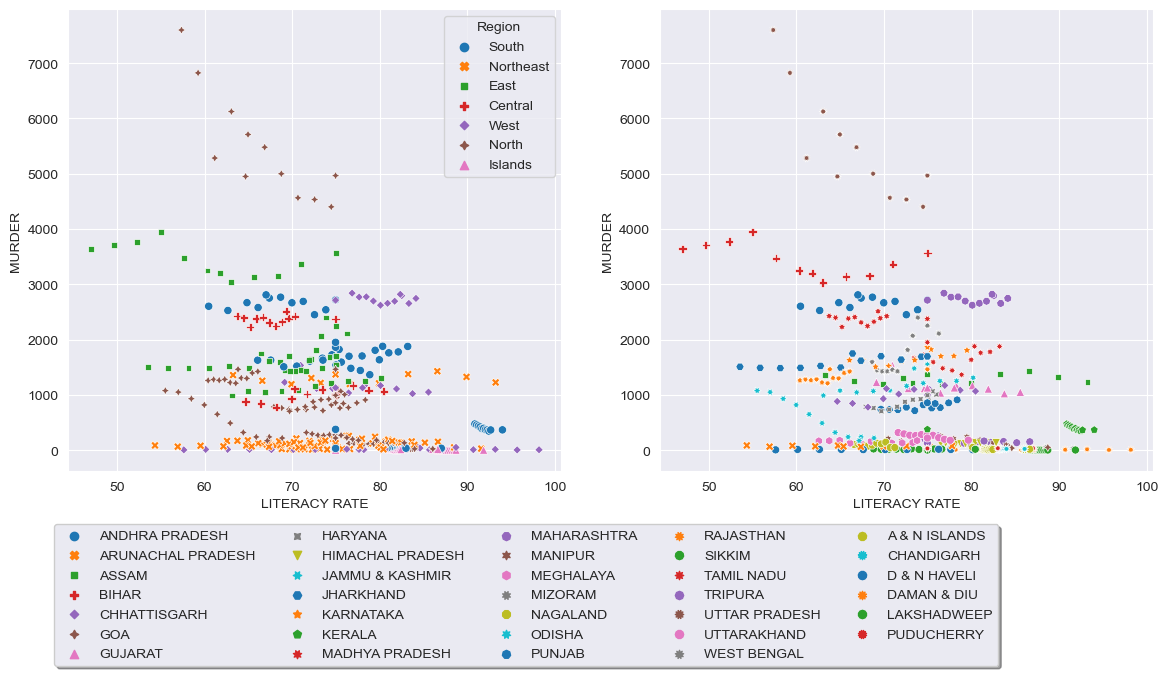

In [17]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='MURDER',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='MURDER',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

We have the same result as attempt to murder and see that Uttar Pradesh and Bihar are the top states with murders with literacy rates being amongst the lowest, which shows that there is a indirect relation between murders and literacy rate.

## Literacy rate vs Rape vs Each State

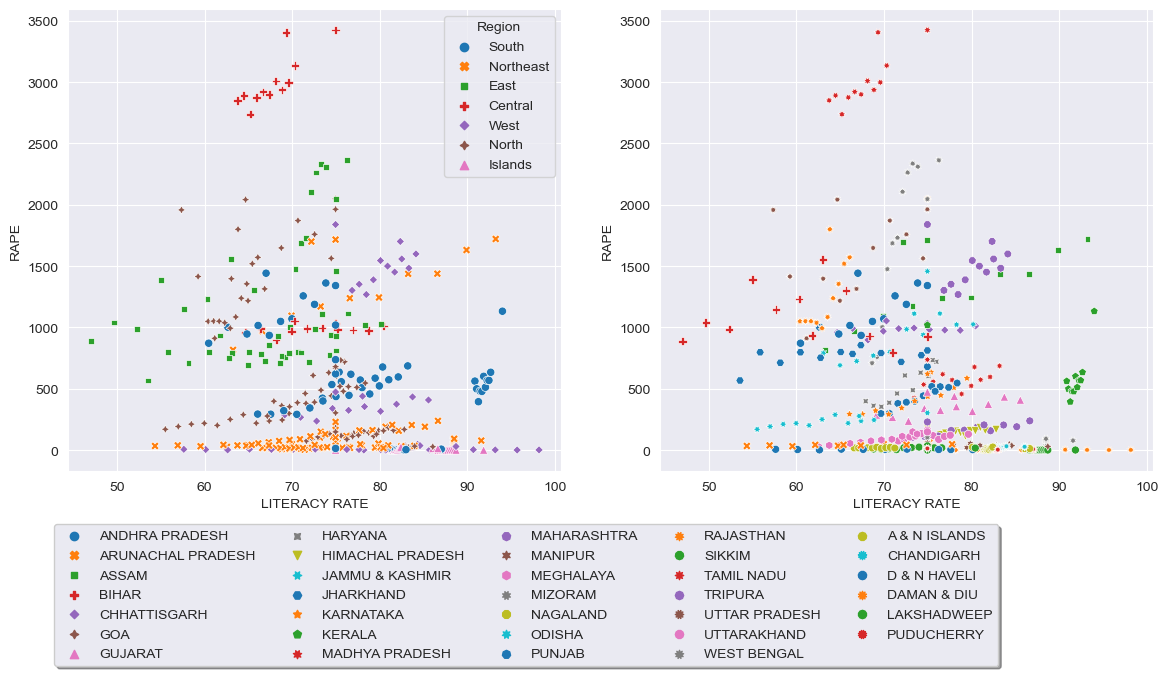

In [18]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='RAPE',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='RAPE',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

From above we can celarly see that after 80% of literacy rate, rapes committed declines sharply which shows indirect relation between the two except Madhya Pradesh and Maharashtra. Madhya pradesh has the highest rape cases even after having above 90% of literacy rates which makes it an exception. Apart from that we can see from the left plot that Islands, northeast and some west and south states

## Literacy rate vs Kidnapping and abduction vs Each State

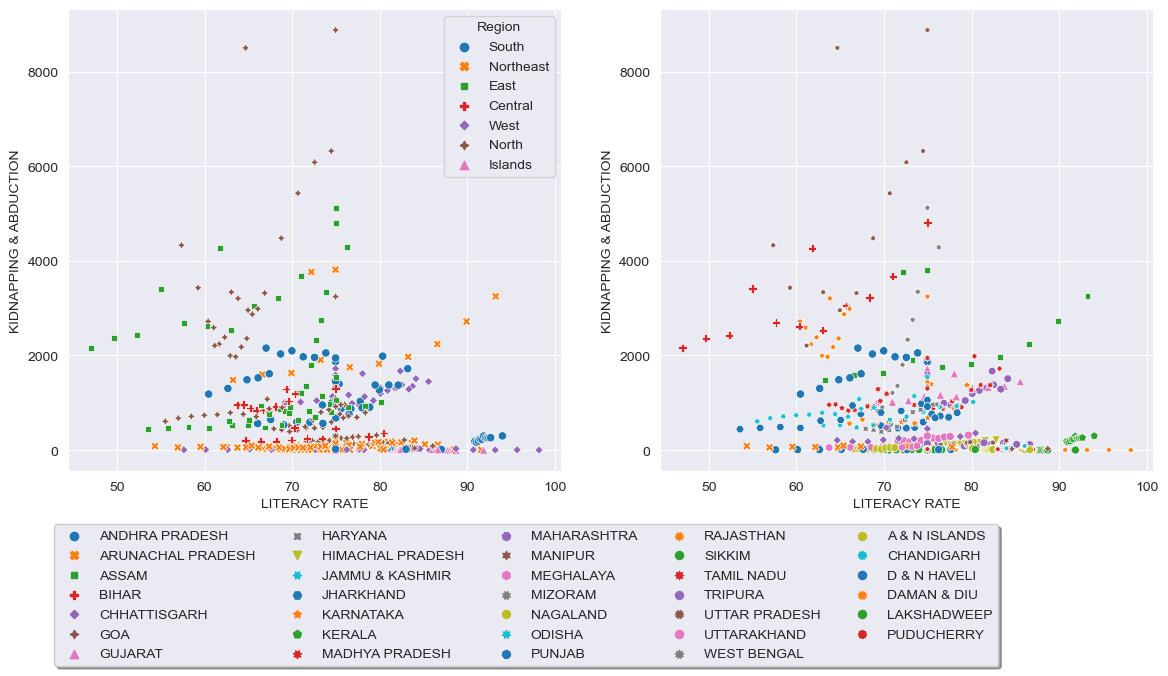

In [19]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='KIDNAPPING & ABDUCTION',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='KIDNAPPING & ABDUCTION',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

We can notice from above graphs that Uttar Pradesh secures the first place again with Jammu and Kashmir and Bihar coming at second. And again Islands, northeast and southern states have the lowest cases and are among the highest literacy rate states

## Literacy rate vs Dacoity vs Each State

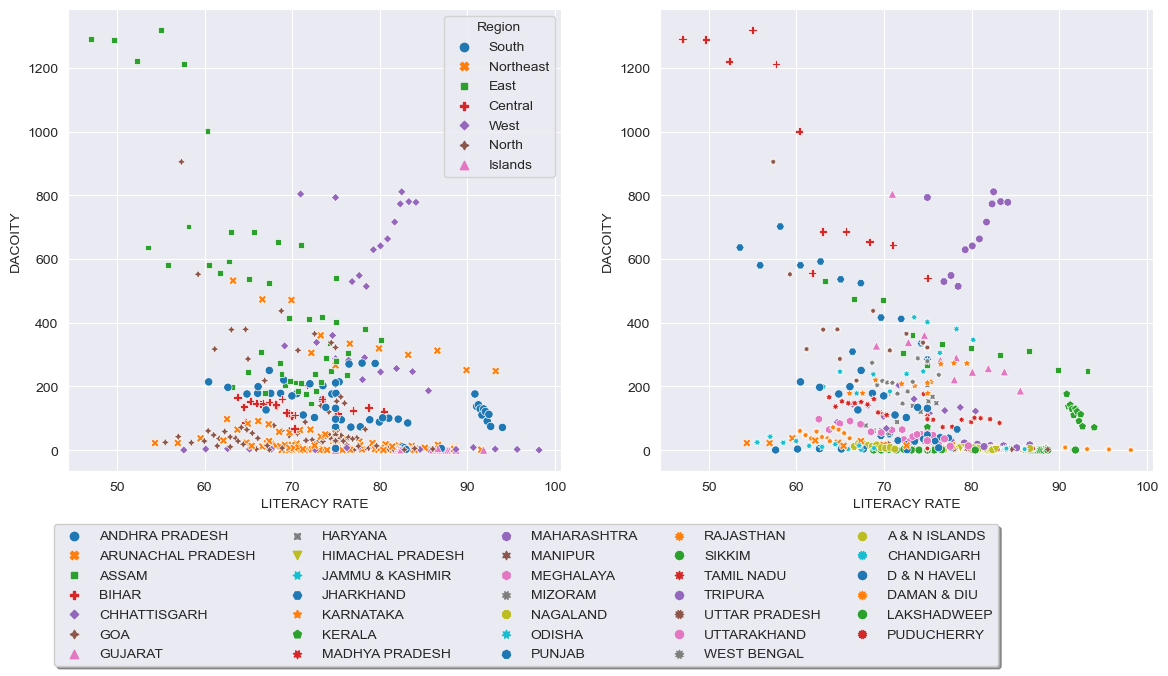

In [20]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='DACOITY',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='DACOITY',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Bihar shows the highest number of dacoity cases accompanied with lowest literacy rate, which shows the indirect relationship again. Maharashtra is the only state which shows high number of cases with more than 80% of literacy rate.

## Literacy rate vs Theft vs Each State

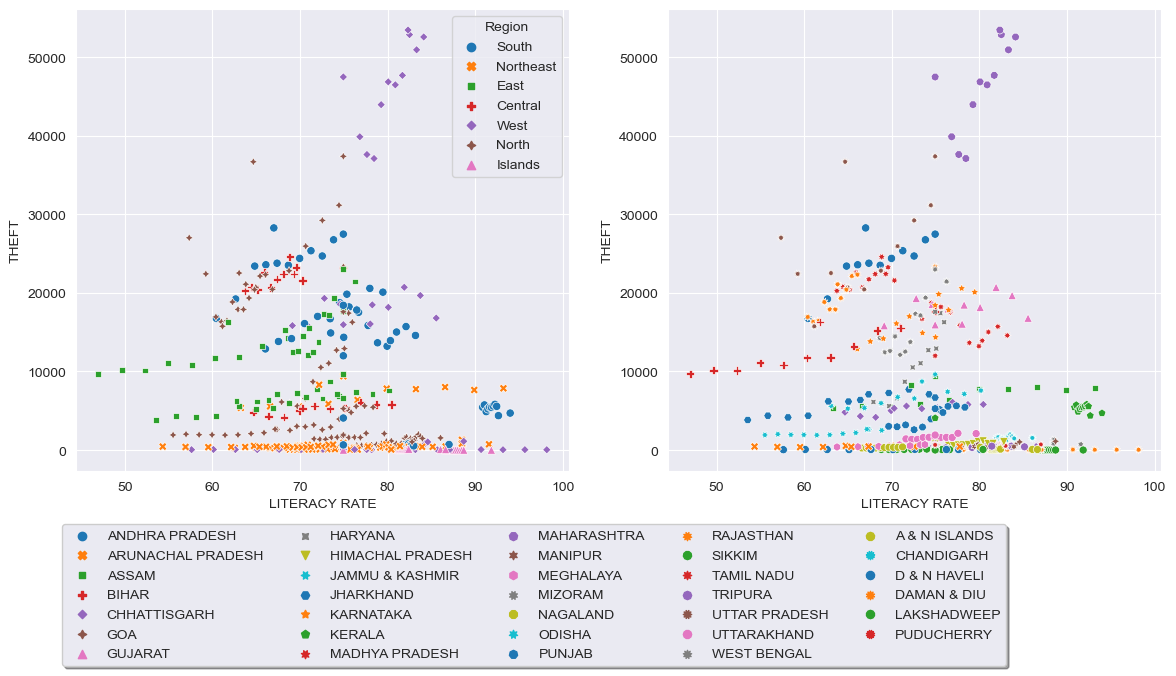

In [21]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='THEFT',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='THEFT',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Maharashtra comes at first with the highest number of theft cases with high literacy rate and Uttar Pradesh comes at second. Madhya Pradesh also has decent amount of cases of theft with high literacy rate which shows that theft doesnt decreases with high literacy rate and it prevails without considering the literacy rate

## Literacy rate vs Riots vs Each State

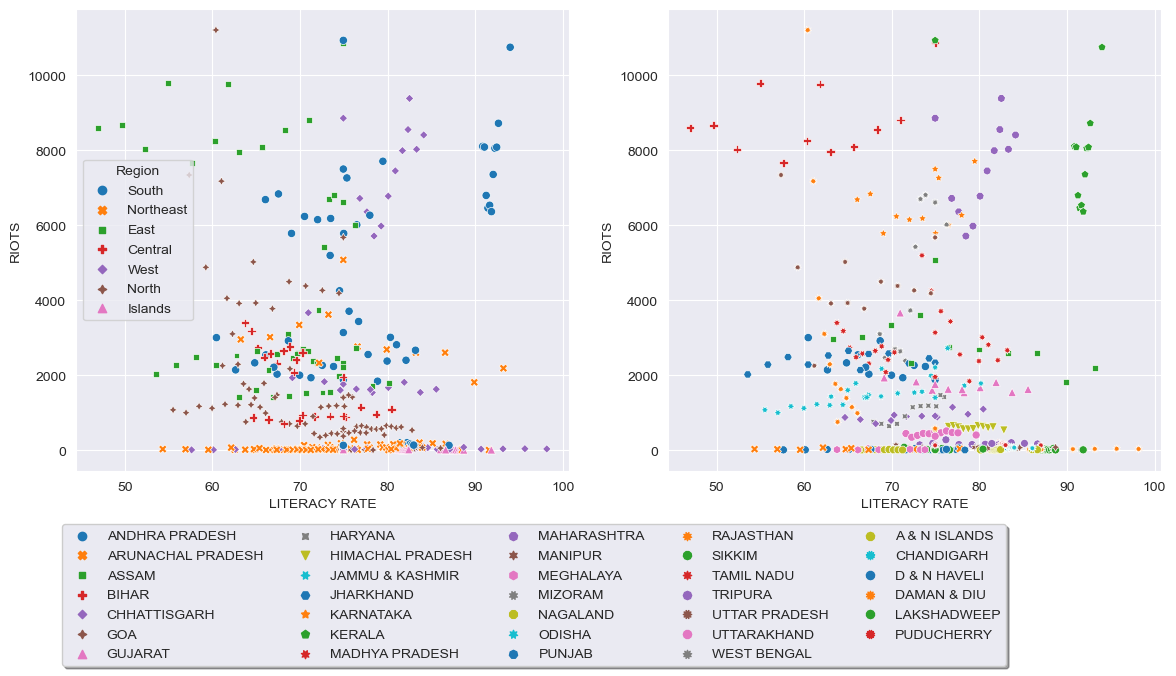

In [22]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='RIOTS',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='RIOTS',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)


From above we see that Riots occur all over the country irrespective of the literacy rate and specially in the states like Bihar (with low literacy rate) and Kerela (with high literacy rate). So there is no relation between the two.

## Literacy rate vs Cheating vs Each State

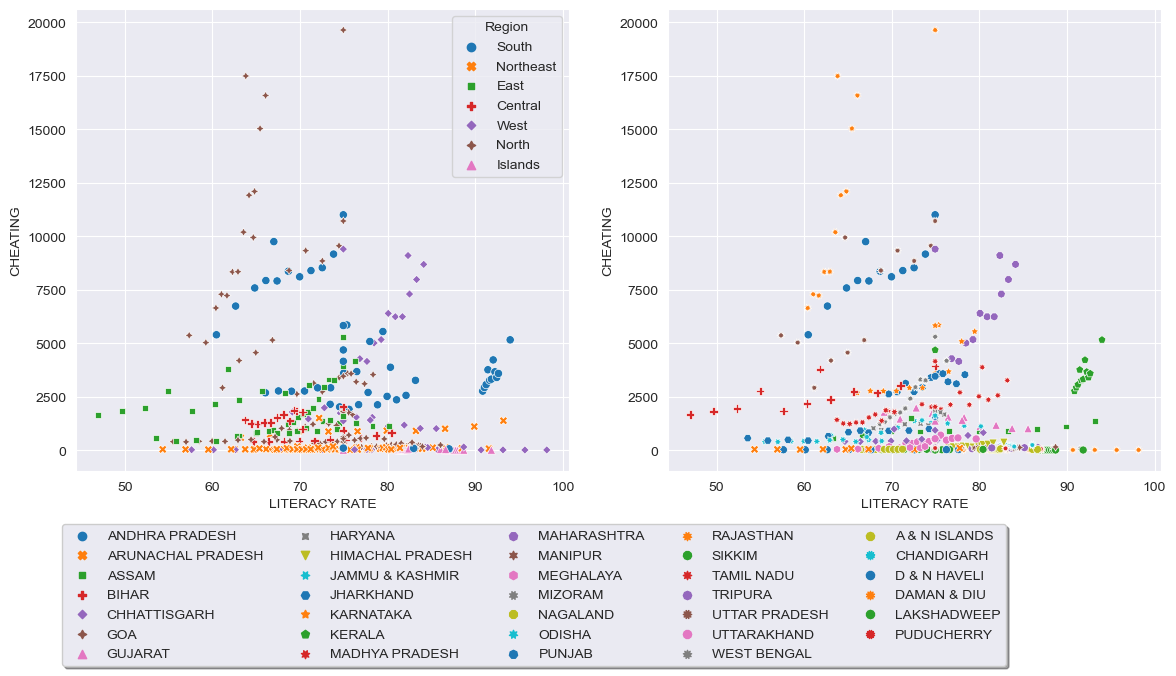

In [23]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='CHEATING',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='CHEATING',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Rajasthan is the state with highest number of cheating cases and we can clearly see that apart from Maharashtra cases drop as the literacy rate rises showing indirect relation between the two.

## Literacy rate vs Counterfieting vs Each State

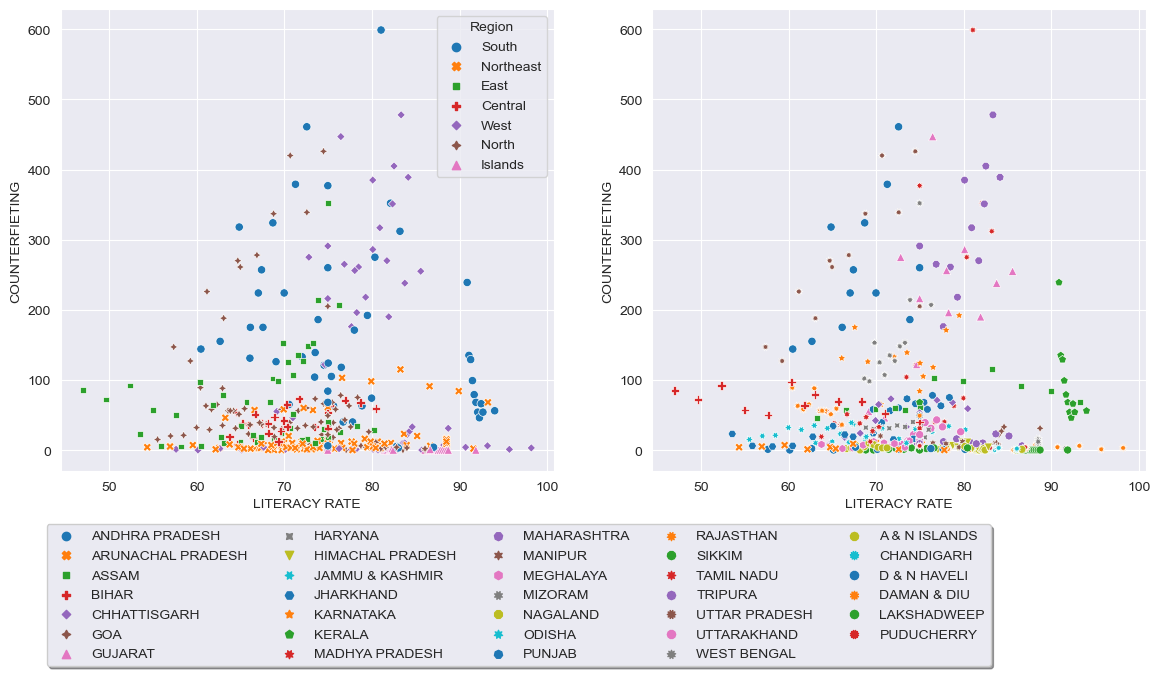

In [24]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='COUNTERFIETING',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='COUNTERFIETING',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Tamil Nadu secures the first place with high literacy rate and Maharashtra comes at second jointly with Andhra Pradesh. This proves that there is no relation with literacy rate and Southern states tops in counterfieting.

## Literacy rate vs Dowry Deaths vs Each State

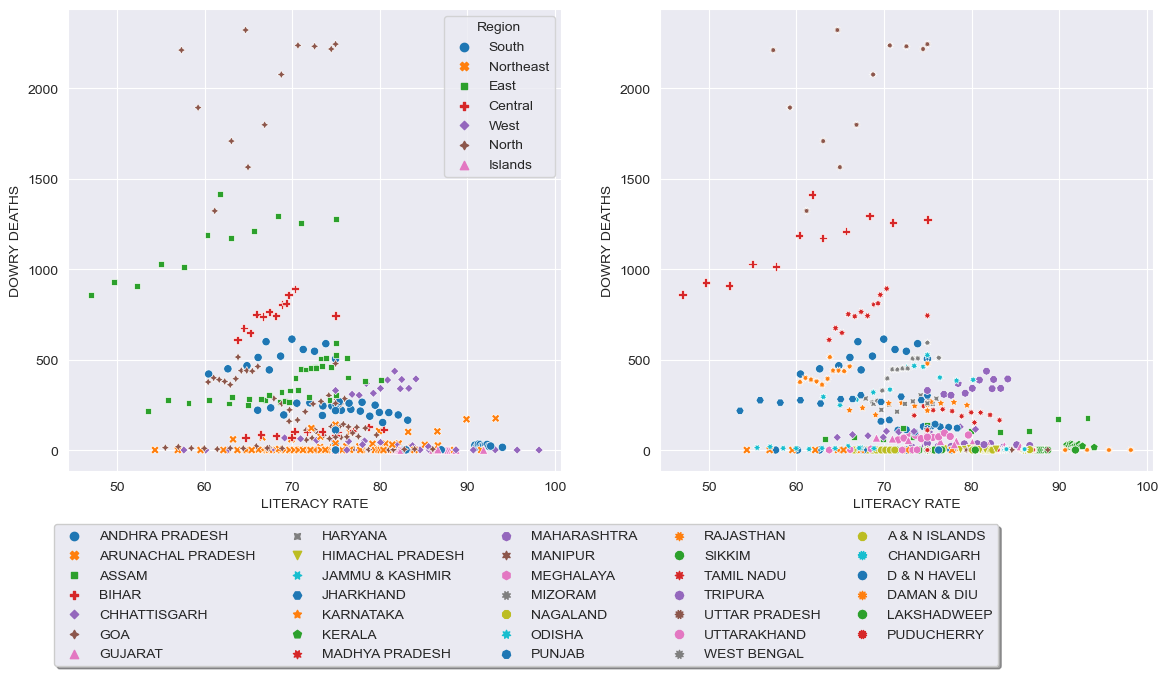

In [25]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='DOWRY DEATHS',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='DOWRY DEATHS',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

We can clearly see from above that Bihar and Uttar Pradesh tops in this case with highest cases and dowry deaths decreases sharply as the literacy rate rises stating indirect relationship.

## Literacy rate vs Hurt/Grevious Hurt vs Each State

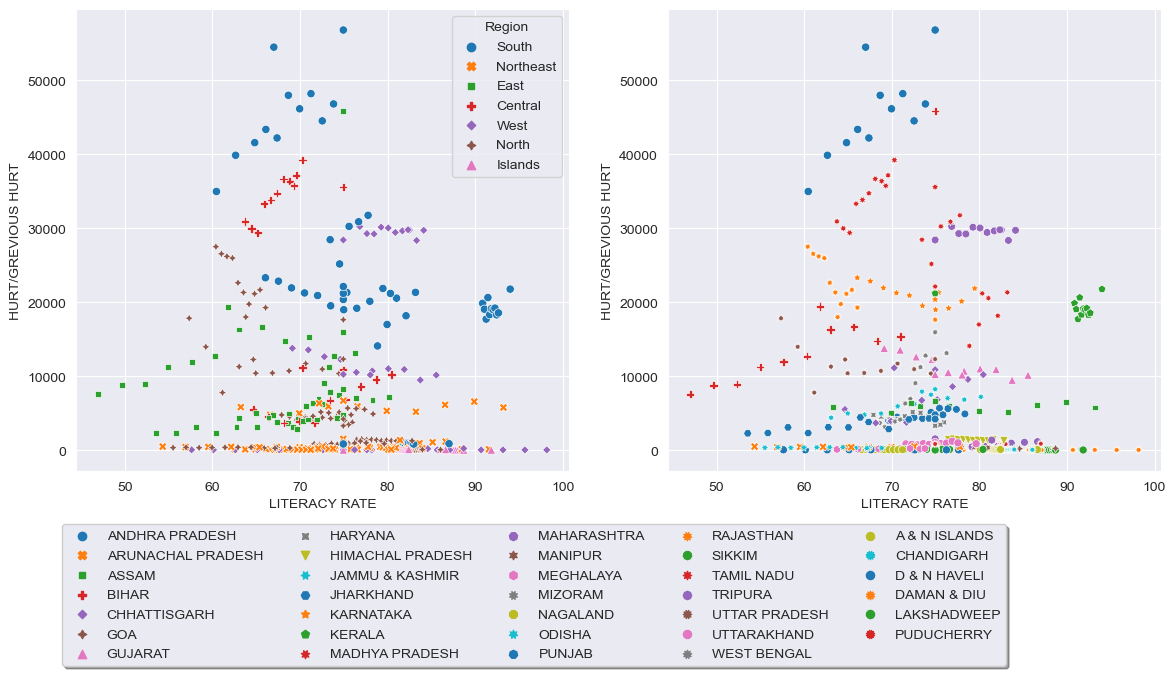

In [26]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='HURT/GREVIOUS HURT',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='HURT/GREVIOUS HURT',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Andhra Pradesh and Madhya Pradesh tops in this category and we can see the scattered points in all directions which shows there is no relationship between literacy rate and hurt/grevious type of crime.

## Literacy rate vs Cruelty by husband or his relatives vs Each State

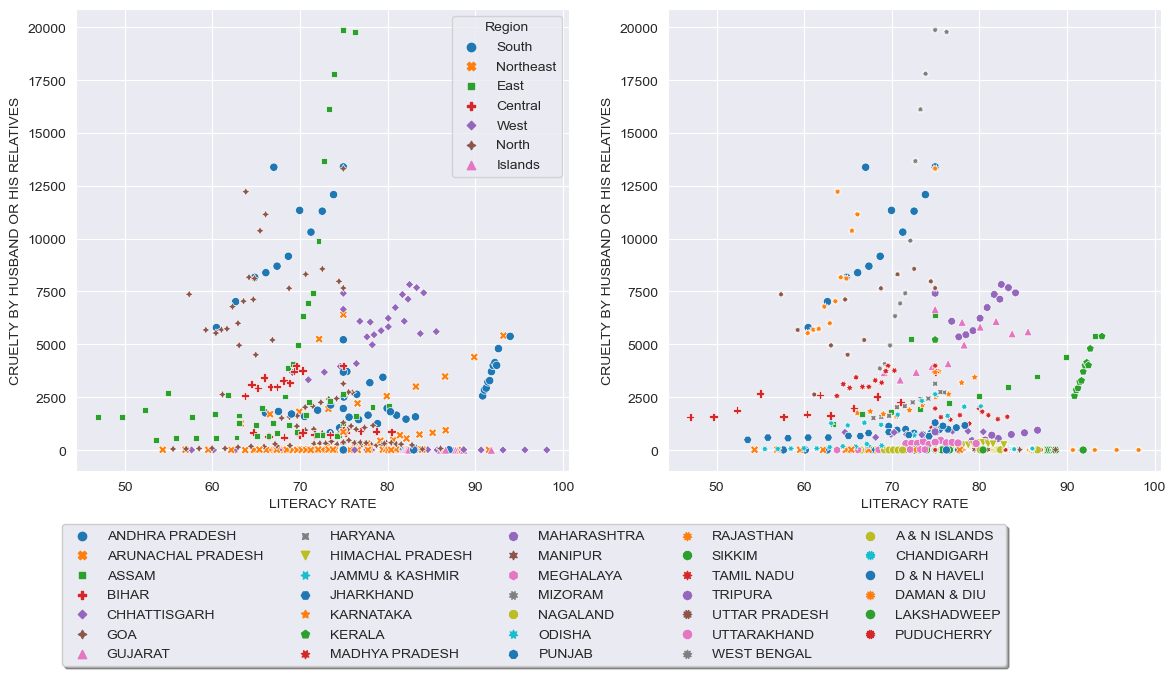

In [27]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='CRUELTY BY HUSBAND OR HIS RELATIVES',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='CRUELTY BY HUSBAND OR HIS RELATIVES',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

West Bengal, Andhra Pradesh and rajasthan are the 3 states with highest cases and even though the cases drop after some rise in literacy rate but still doesnt decrease much as Kerela( with highest literacy rate) still has more cases than some states with lower literacy rates.

## Literacy rate vs Other IPC crimes vs Each State

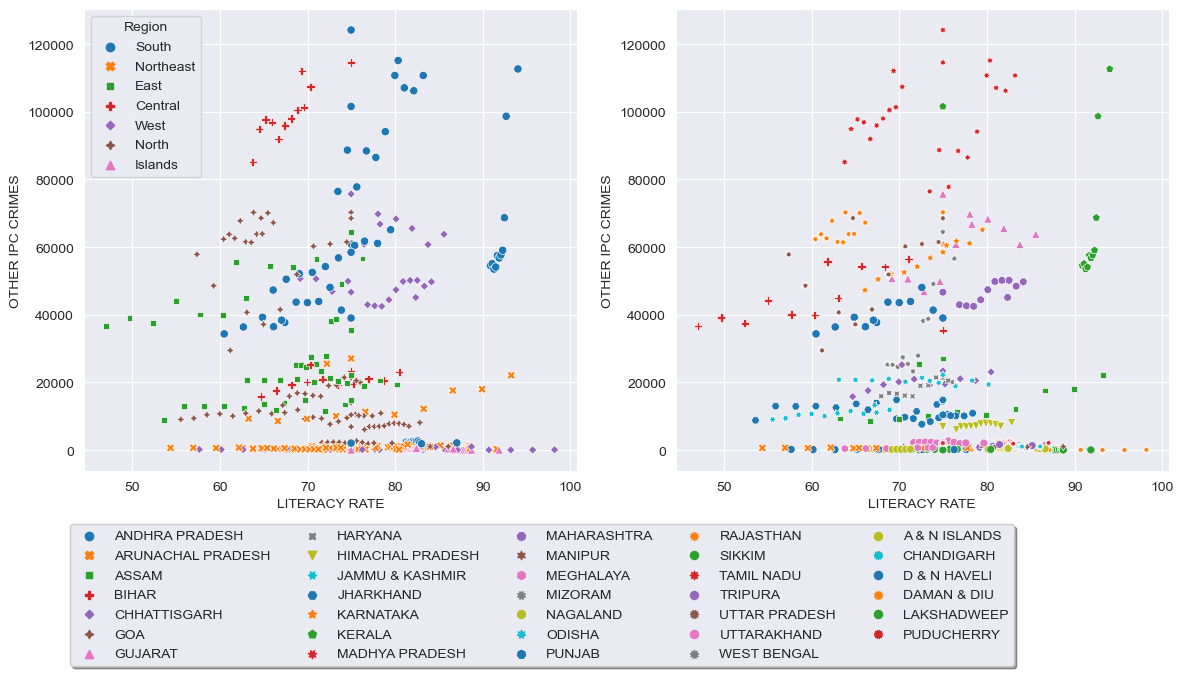

In [28]:
fig,axes = plt.subplots(1,2, figsize=(14,6))
sns.scatterplot(ax=axes[0],x='LITERACY RATE',y='OTHER IPC CRIMES',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='LITERACY RATE',y='OTHER IPC CRIMES',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

Tamil Nadu, Madhya Pradesh and Kerela are the top 3 states with most other IPC crimes and are also one of the states with higesht literacy state which shows that there is a direct relation between the two in this case, which can be a happen because of population, crimes reported and many other factors.

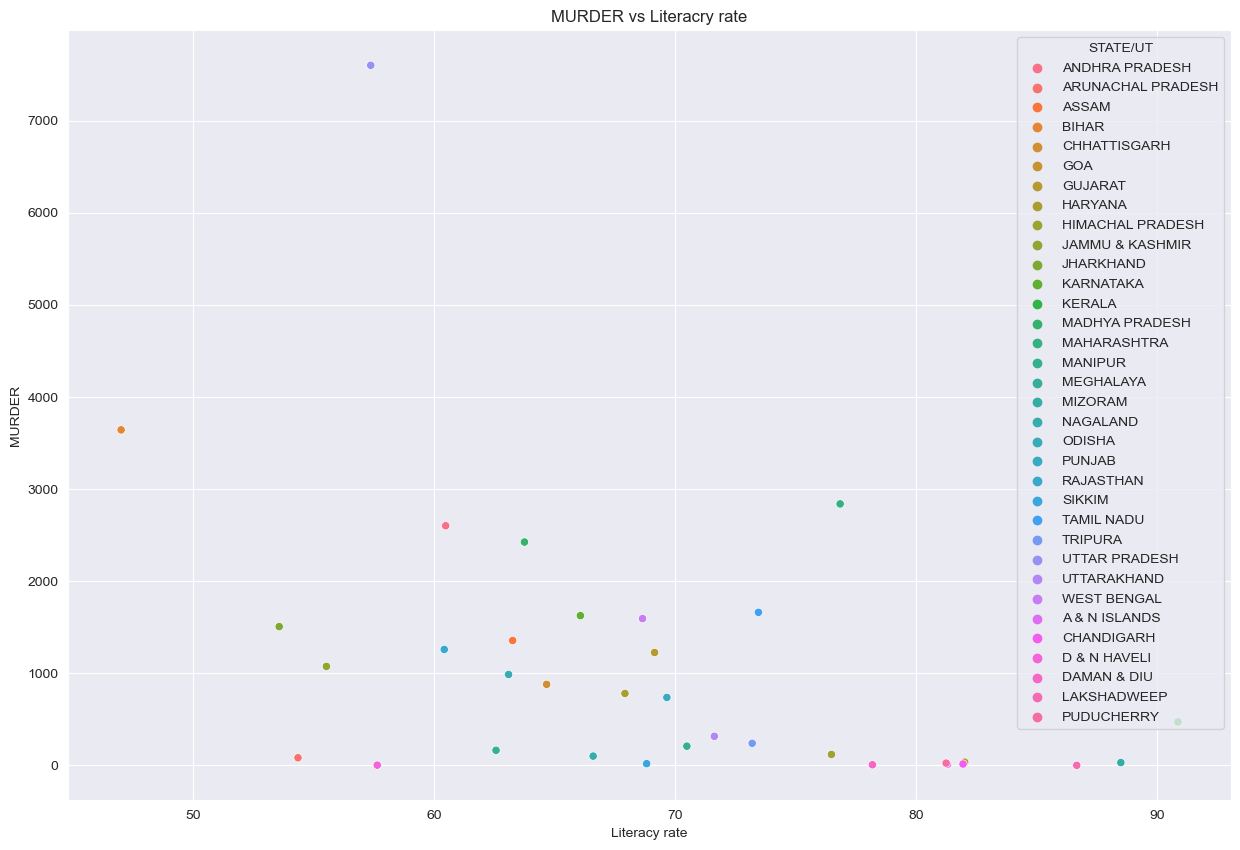

In [29]:
#plotting a scatter plot bewteen murder and literacy rate
plt.figure(figsize = (15,10))
sns.scatterplot(y = 'MURDER', x= 'LITERACY RATE', data = df, hue =(df['STATE/UT'].drop_duplicates()) )
plt.title('MURDER vs Literacry rate')
plt.ylabel('MURDER')
plt.xlabel('Literacy rate')
plt.show()

overall Murder cases in statewise

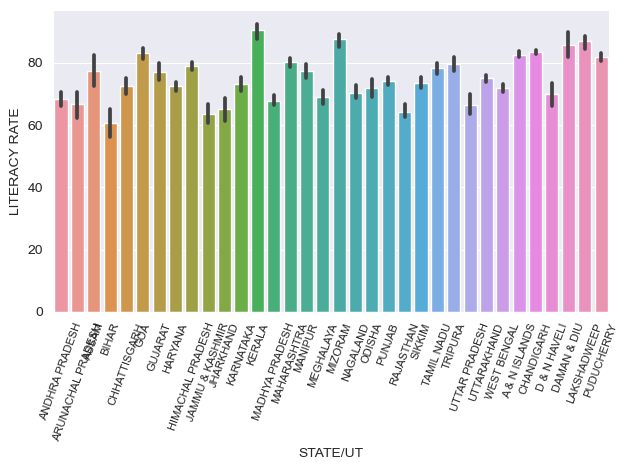

In [30]:
fig=plt.figure()
sns.barplot(x='STATE/UT',y='LITERACY RATE',data=df)
plt.xticks(rotation=70,size=8)
plt.tight_layout()

Statewise Literacy Rate elabroted.

Kerala with the highest literacy rate does have medium crime rate. we can compare the states with each other since they have been converted into a uniform scale for comparing. Whereas, there are states like Maharashtra where the crime rate is very high with a relatively lower literacy rate. The same with Andhra Pradesh, Arunachal Pradesh and Bihar too.so the states and its crime rate vs literacy all are inter related with each other

# 2.3 Analysis of year-on-year total crime rate.

We will analyse each states total crime rate year on year regiona wise for better understanding and relation. It will also help by reducing the amount of codes we have to use for each state

In [31]:
si=df.set_index("Region")
nr= si.loc[["North"]]
nr= nr.reset_index()
nr

Region          STATE/UT  YEAR  POPULATION  LITERACY RATE  \
0   North           HARYANA  2001    21144564      67.910000   
1   North  HIMACHAL PRADESH  2001     6077900      76.480000   
2   North   JAMMU & KASHMIR  2001    10143700      55.520000   
3   North            PUNJAB  2001    24358999      69.650000   
4   North         RAJASTHAN  2001    56507188      60.410000   
..    ...               ...   ...         ...            ...   
91  North            PUNJAB  2012    28379180      74.954053   
92  North         RAJASTHAN  2012    65494555      74.954053   
93  North     UTTAR PRADESH  2012   205888020      74.954053   
94  North       UTTARAKHAND  2012     9501846      74.954053   
95  North        CHANDIGARH  2012     1144839      86.050000   

    AREA (in sq. km)  MURDER  ATTEMPT TO MURDER  \
0              44212     781                467   
1              55673     119                 75   
2             222236    1075               1474   
3              50362     738                789   
4             342239    1259               1923   
..               ...     ...                ...   
91             50362     855               1045   
92            342239    1461               1538   
93            240928    4966               4811   
94             53483     217                161   
95               114      21                 44   

    CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          78   398               0   
1                                          11   124               0   
2                                          33   169               0   
3                                          80   298               0   
4                                          63  1049               0   
..                                        ...   ...             ...   
91                                        104   680               1   
92                                         98  2049               0   
93                                       1410  1963               0   
94                                         44   148               0   
95                                          5    27               0   

    OTHER RAPE  KIDNAPPING & ABDUCTION  \
0          398                     449   
1          124                     126   
2          169                     606   
3          298                     513   
4         1049                    2718   
..         ...                     ...   
91         679                     919   
92        2049                    3243   
93        1963                    8878   
94         148                     297   
95          27                      87   

    KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                           297   
1                                           105   
2                                           504   
3                                           324   
4                                          2165   
..                                          ...   
91                                          689   
92                                         2697   
93                                         7910   
94                                          256   
95                                           66   

    KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                  152       77   
1                                   21        4   
2                                  102       24   
3                                  189       45   
4                                  553       60   
..                                 ...      ...   
91                                 230       48   
92                                 546       31   
93                                 968      322   
94                                  41       29   
95                                  21        3   

    PREPARATION AND ASSEMBLY FOR DACO

In [32]:
df.head(1)

STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  MURDER  \
0  ANDHRA PRADESH  2001    76210007          60.47            275045    2602   

   ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
0               1555                                        136   871   

   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0               0         871                    1182   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                          765   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                 417      214   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  AUTO THEFT  \
0                                     9      629      7220  16751        3051   

   OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  COUNTERFIETING  \
0        13700   3001                       788      5391             144   

   ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0    872               34947           420   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                               3544     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                        2271                                 5791   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            7                         7400   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  CRIMES AGAINST SC  CRIMES AGAINST ST  \
0             34344            130089               2933                512   

   Crimes Against Women  CRIMES AGAINST CHILDREN  JUVENILES APPREHENDED  \
0                 13669                    270.0                 3428.0   

   POLICEMEN KILLED ON DUTY  THEFT CASES REPOERTED  THEFT VALUE TOTAL  \
0                      70.0                24814.0        423123832.0   

   TOTAL  Dacoity  TOTAL  Robbery  TOTAL  Burglary  TOTAL  Theft  \
0           214.0           629.0           7220.0       16751.0   

   Human Rights Violation Cases Region  
0                            45  South

In [33]:
df['Crime Rate'] = round(((df['OTHER IPC CRIMES'] + df['TOTAL IPC CRIMES']+
                               df['CRIMES AGAINST SC']+df['CRIMES AGAINST ST']+
                               df['Crimes Against Women']+df['CRIMES AGAINST CHILDREN']+
                               df['TOTAL  Theft']+df['TOTAL  Robbery']) / df['POPULATION']) *100000,2)

In [34]:
df.sample(2)

STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  MURDER  \
83       MANIPUR  2003     2398400          73.47             22327     150   
38  CHHATTISGARH  2002    21045463          66.41            135191     844   

    ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
83                199                                          6    18   
38                453                                         24   992   

    CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
83               0          18                     120   
38               0         992                     178   

    KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
83                                           71   
38                                          154   

    KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
83                                  49        3   
38                                  24      144   

    PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
83                                     0        6        68    252   
38                                     6      326      3731   4302   

    AUTO THEFT  OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
83         124          128     73                        16        76   
38         889         3413    817                        96       393   

    COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
83               7     47                 324             0   
38              18    235                4484            85   

    ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
83                                                 44     
38                                               1483     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
83                           0                                    4   
38                         147                                  653   

    IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
83                                            0                            4   
38                                            0                          963   

    OTHER IPC CRIMES  TOTAL IPC CRIMES  CRIMES AGAINST SC  CRIMES AGAINST ST  \
83              1120              2537                  0                  4   
38             17576             37950                443                508   

    Crimes Against Women  CRIMES AGAINST CHILDREN  JUVENILES APPREHENDED  \
83                   137                     36.0                    0.0   
38                  3514                    733.0                 2802.0   

    POLICEMEN KILLED ON DUTY  THEFT CASES REPOERTED  THEFT VALUE TOTAL  \
83                      11.0                  329.0         11398302.0   
38                      15.0                 8503.0        107921347.0   

    TOTAL  Dacoity  TOTAL  Robbery  TOTAL  Burglary  TOTAL  Theft  \
83             3.0             6.0             68.0         252.0   
38           144.0           326.0           3731.0        4302.0   

    Human Rights Violation Cases     Region  Crime Rate  
83                             3  Northeast      170.61  
38                             5    Central      310.53

In [35]:
nr['Crime Rate'] = round(((nr['OTHER IPC CRIMES'] + nr['TOTAL IPC CRIMES']+
                               nr['CRIMES AGAINST SC']+nr['CRIMES AGAINST ST']+
                               nr['Crimes Against Women']+nr['CRIMES AGAINST CHILDREN']+
                               nr['TOTAL  Theft']+nr['TOTAL  Robbery']) / nr['POPULATION']) *100000,2)

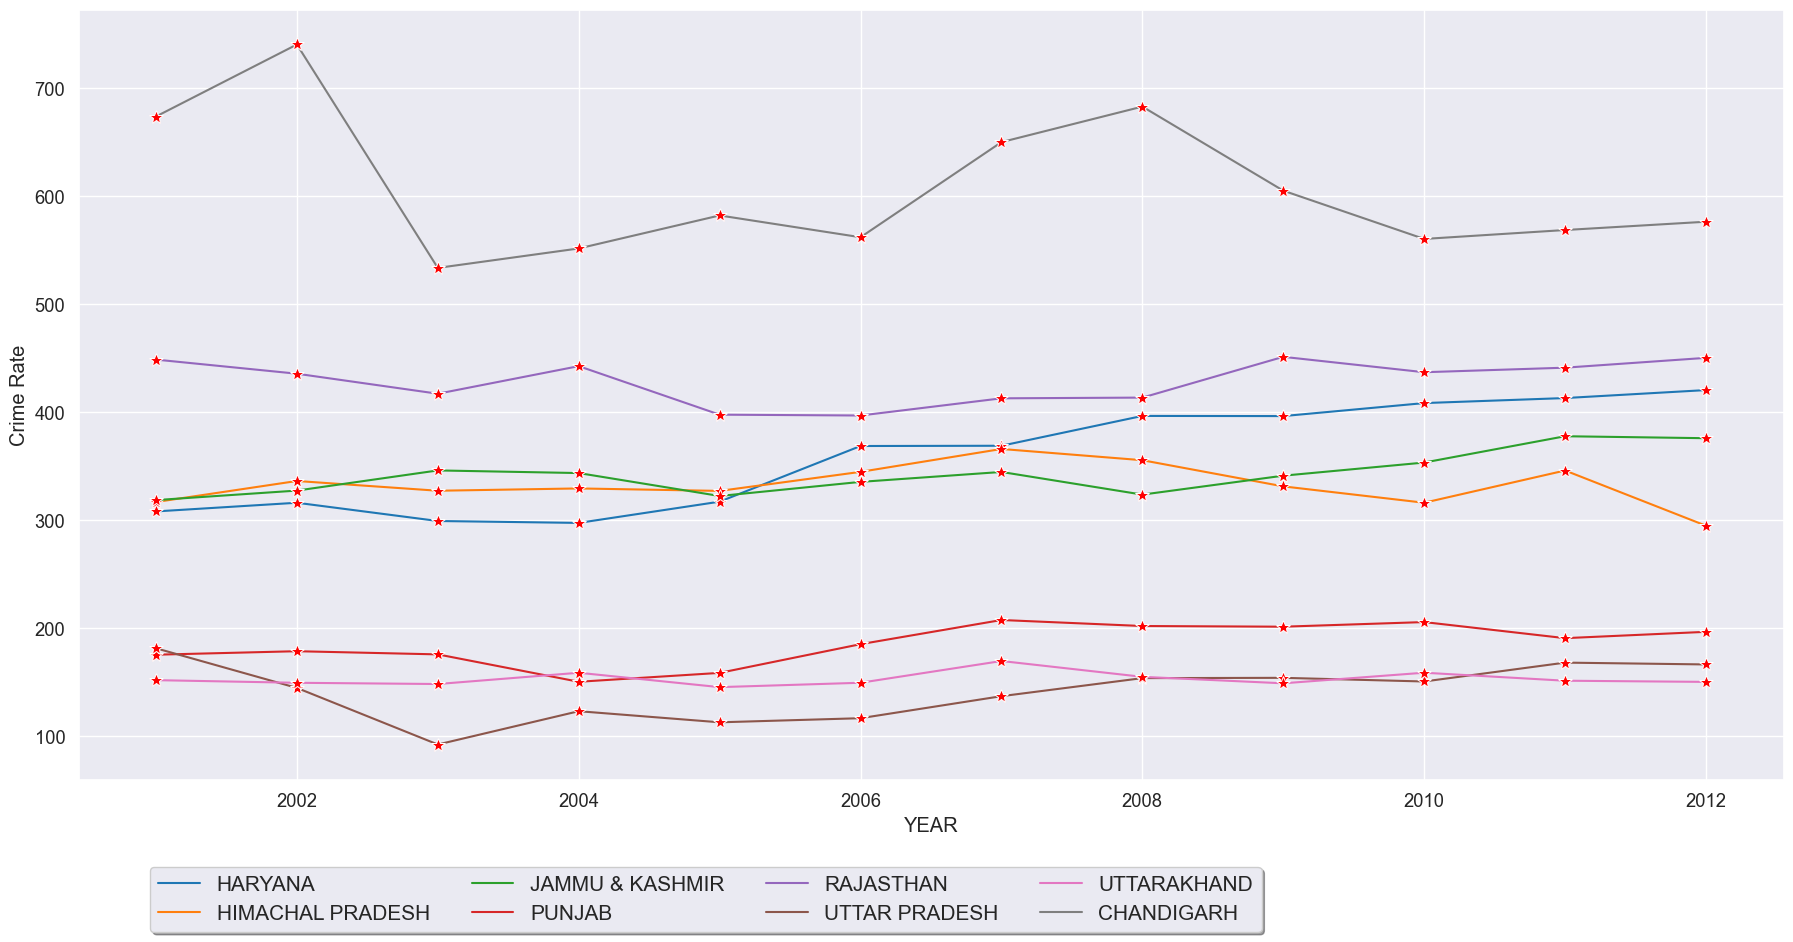

In [36]:
plt.figure(figsize=(22, 10))
sns.set(font_scale=1.2)
sns.lineplot(data=nr,x='YEAR',y='Crime Rate',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
plt.show()

In [37]:
si2=df.set_index("Region")
wr= si2.loc[["West"]]
wr= wr.reset_index()
wr.sample(3)

Region      STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
35   West           GOA  2008     1521706          84.01              3702   
4    West   DAMAN & DIU  2001      158204          78.18               112   
38   West  D & N HAVELI  2008      244779          75.13               491   

    MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
35      49                 25                                         11   
4        7                  5                                          0   
38       9                  2                                          0   

    RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
35    30               0          30                      36   
4      0               0           0                       5   
38     6               0           6                      17   

    KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
35                                           28   
4                                             3   
38                                           11   

    KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
35                                   8        3   
4                                    2        0   
38                                   6        1   

    PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
35                                     0       23       302    601   
4                                      0        0        43     40   
38                                     0        0        49     54   

    AUTO THEFT  OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
35         238          363    102                        47       105   
4           20           20     23                         5         9   
38          18           36     24                        10        24   

    COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
35              22     27                 185             2   
4                1      3                  21             0   
38               1      6                  26             0   

    ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
35                                                 32     
4                                                   0     
38                                                  4     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
35                          12                                   12   
4                            0                                    4   
38                           0                                    4   

    IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
35                                            0                          230   
4                                             0                            0   
38                                            0                           10   

    OTHER IPC CRIMES  TOTAL IPC CRIMES  CRIMES AGAINST SC  CRIMES AGAINST ST  \
35               886              2742                  4                  1   
4                 73               239                  0                  0   
38               154               401                  1                 10   

    Crimes Against Women  CRIMES AGAINST CHILDREN  JUVENILES APPREHENDED  \
35                   116                     80.0                  152.0   
4                      7                      0.0                    4.0   
38                    25                     17.0                   59.0   

    POLICEMEN KILLED ON DUTY  THEFT CASES REPOERTED  THEFT VALUE TOTAL  \
35                       0.0                  929.0         72819671.0   
4                        0.0                   83.0          3707732.0   
38                       0.0                  104.0         11846843.0   

    TOTAL  Dacoity  TOTAL  Robbery  TOTAL  Burglary  TOTAL  Theft  \
35             3.0            23.0            302.0 

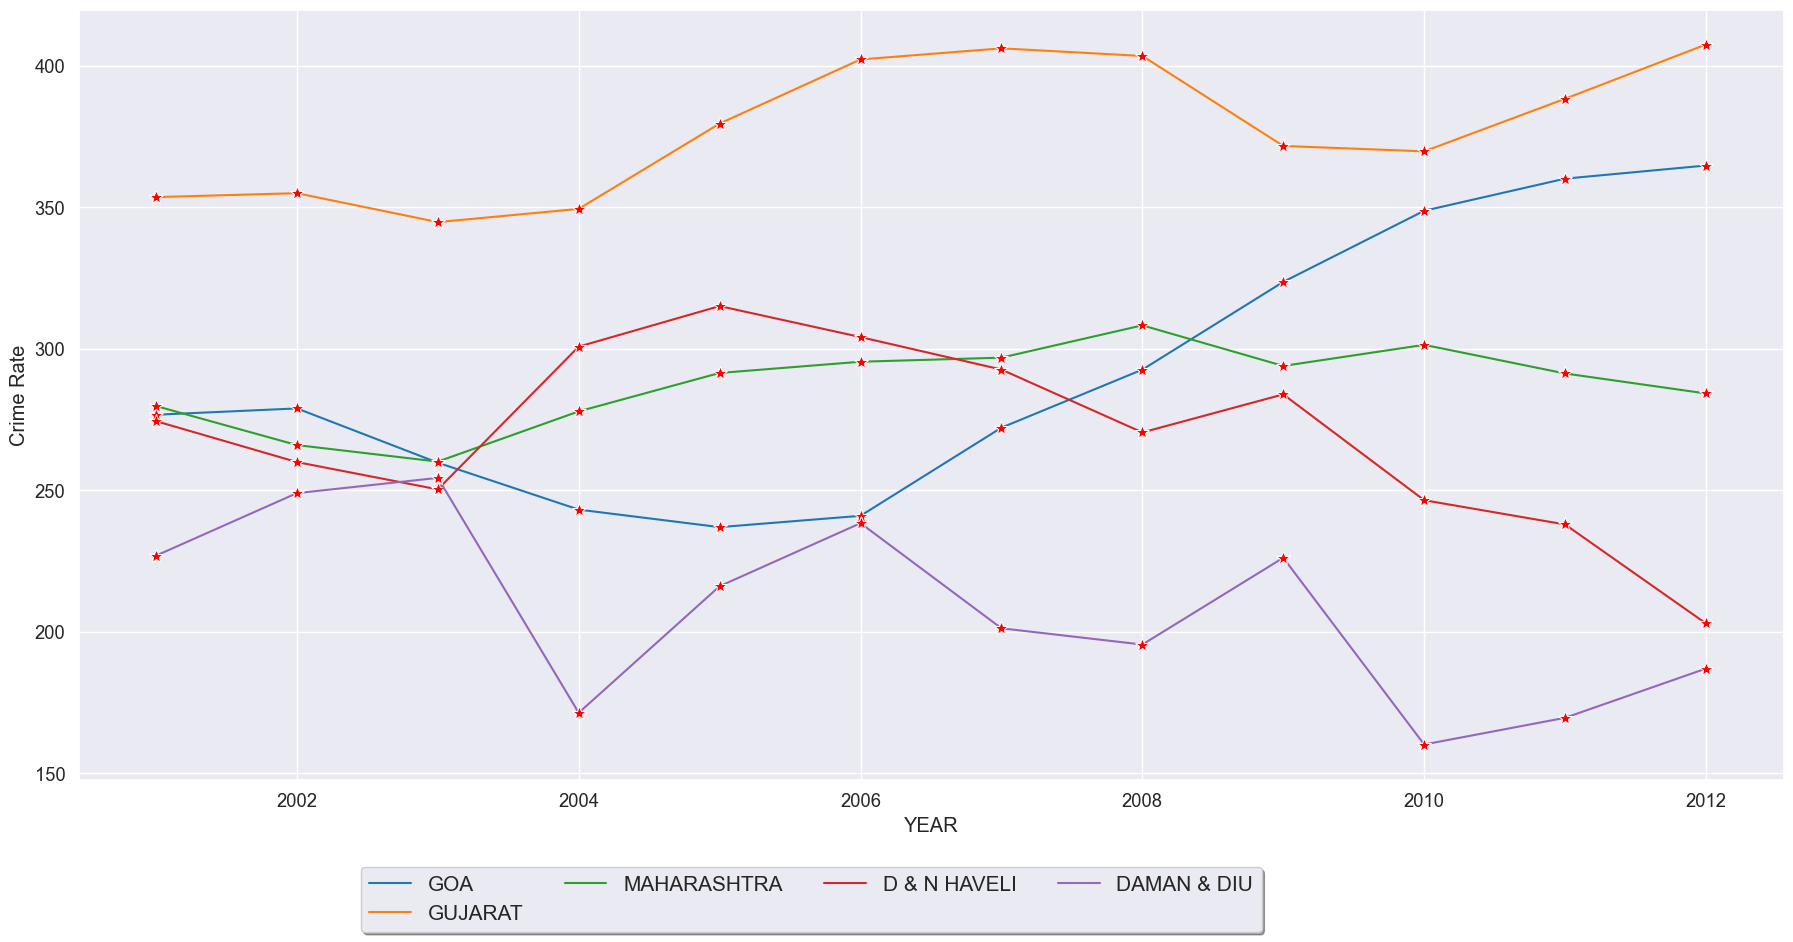

In [38]:
plt.figure(figsize=(22, 10))
sns.set(font_scale=1.2)
sns.lineplot(data=wr,x='YEAR',y='Crime Rate',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
plt.show()

In [39]:
si3=df.set_index("Region")
sr= si3.loc[["South"]]
sr= sr.reset_index()
sr.sample(3)

Region        STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
37  South          KERALA  2008    33501597          92.26             38852   
1   South       KARNATAKA  2001    52709035          66.06            191791   
50  South  ANDHRA PRADESH  2011    91912596          67.02            275045   

    MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
37     362                434                                         95   
1     1626               1475                                         74   
50    2808               2229                                        171   

    RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
37   568               0         568                     253   
1    293               0         293                     559   
50  1442               0        1442                    2154   

    KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
37                                          166   
1                                           271   
50                                         1612   

    KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
37                                  87       91   
1                                  288      178   
50                                 542      126   

    PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
37                                   267      816      3882   5818   
1                                     36      847      6394  12868   
50                                     7      600      8300  28267   

    AUTO THEFT  OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
37        1981         3837   8057                       435      3659   
1         4016         8852   6686                       494      2678   
50        8966        19301   2210                      1174      9748   

    COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
37              46    389               19178            31   
1              131    352               23285           220   
50             224   1021               54452           599   

    ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
37                                               2745     
1                                                1665     
50                                               4849     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
37                         258                                 4138   
1                           81                                 1755   
50                        3658                                13376   

    IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
37                                            0                           37   
1                                             0                          100   
50                                            0                        13973   

    OTHER IPC CRIMES  TOTAL IPC CRIMES  CRIMES AGAINST SC  CRIMES AGAINST ST  \
37             59061            110620                519                106   
1              47301            109098               1621                276   
50             38392            189780               4016                805   

    Crimes Against Women  CRIMES AGAINST CHILDREN  JUVENILES APPREHENDED  \
37                  7906                    549.0            1590.000000   
1                   4285                     68.0            1484.000000   
50                 25536                   2213.0            1721.067647   

    POLICEMEN KILLED ON DUTY  THEFT CASES REPOERTED  THEFT VALUE TOTAL  \
37                  8.000000                10607.0       6.667142e+08   
1                  14.000000                20287.0       4.931582e+08   
50                 24.082353                37293.0       1.819340e+09   

    TOTAL  Dacoity  TOTAL  Robbery  TOTAL  Burglary  TOTAL  Theft  \
37            91.0           816.0          

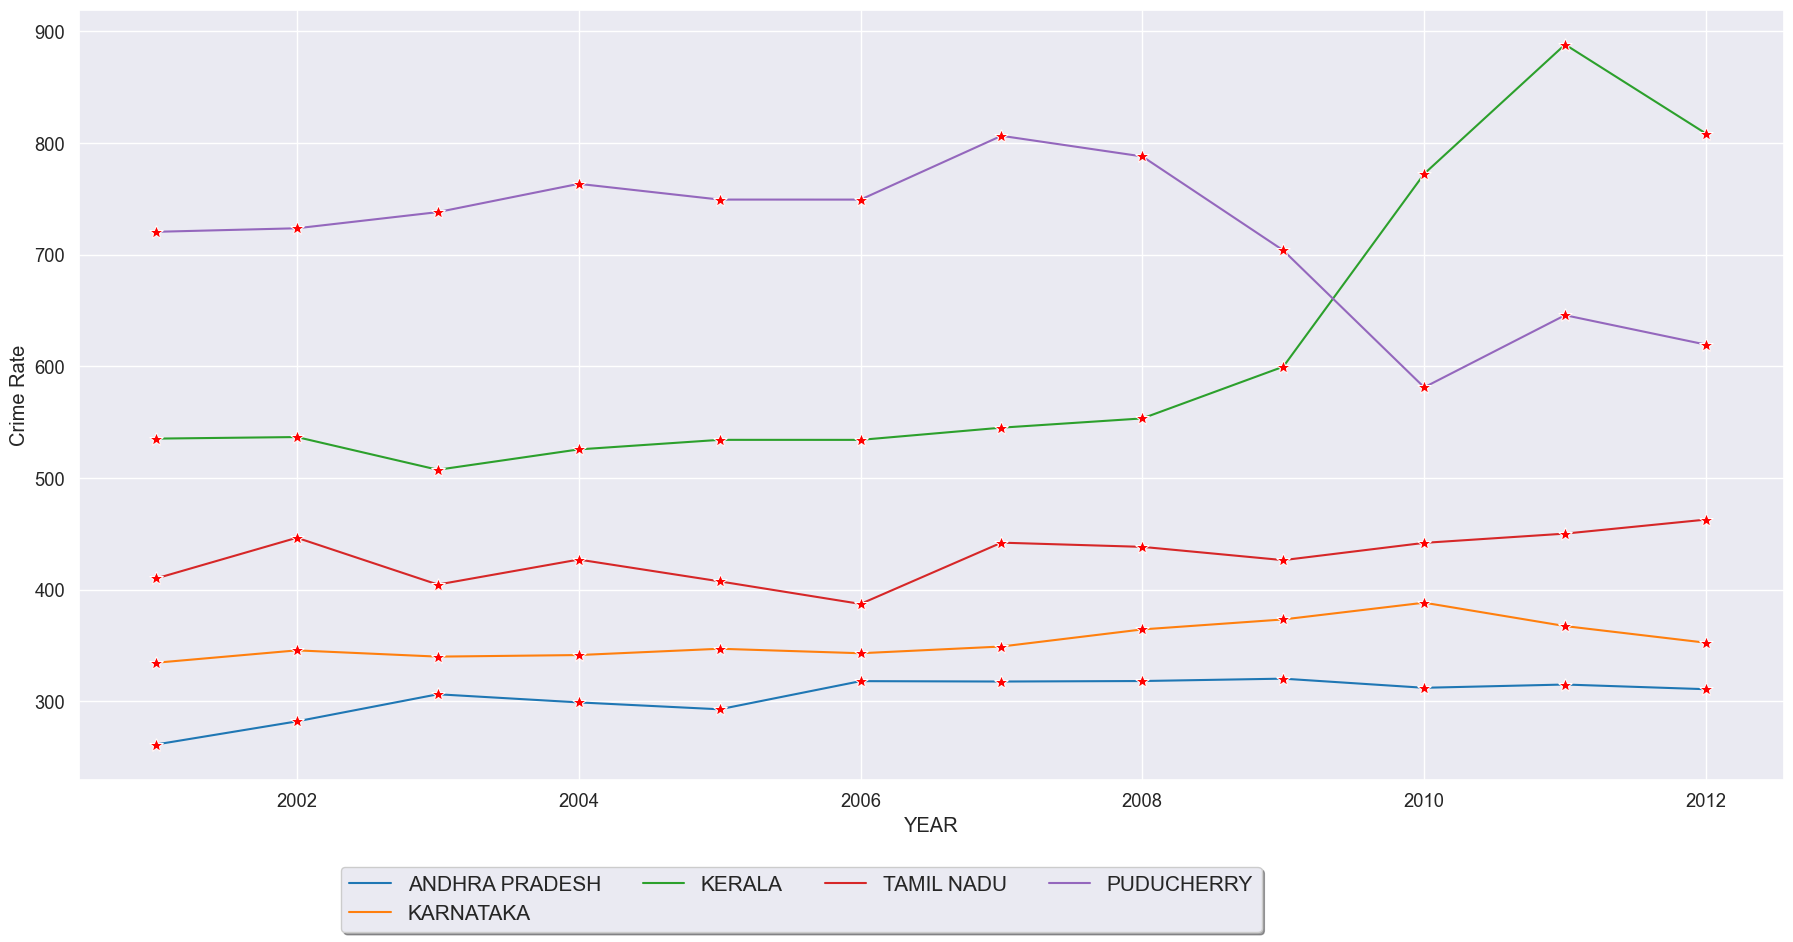

In [40]:
plt.figure(figsize=(22, 10))
sns.set(font_scale=1.2)
sns.lineplot(data=sr,x='YEAR',y='Crime Rate',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
plt.show()

So in the Southern Region Puducherry had the highest crime rate till 2009 but after that kerela took over and has been at the top since

In [41]:
si4=df.set_index("Region")
er= si4.loc[["East"]]
er= er.reset_index()
er.head()

Region     STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
0   East        BIHAR  2001    82998509          47.00             94163   
1   East    JHARKHAND  2001    26945829          53.56             74677   
2   East       ODISHA  2001    36804660          63.08            155707   
3   East  WEST BENGAL  2001    80176197          68.64             88752   
4   East        BIHAR  2002    84184099          49.66             94163   

   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
0    3643               3419                                        250   888   
1    1507                866                                        143   567   
2     987               1151                                         53   790   
3    1594                449                                        581   709   
4    3712               3526                                        396  1040   

   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0               0         888                    2159   
1               0         567                     441   
2               0         790                     522   
3               0         709                     875   
4               0        1040                    2361   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                          518   
1                                          279   
2                                          434   
3                                          695   
4                                          744   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                1641     1291   
1                                 162      636   
2                                  88      199   
3                                 180      274   
4                                1617     1289   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  AUTO THEFT  \
0                                   147     2203      3233   9701        1050   
1                                    48      647      1266   3827         754   
2                                    22      958      3093   5622         817   
3                                   421      660       426  14245        2562   
4                                   141     2288      3188  10145        1131   

   OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  COUNTERFIETING  \
0         8651   8606                       946      1659              85   
1         3073   2018                       283       554              23   
2         4805   1426                       285       681              10   
3        11683   3095                       486      1216             102   
4         9014   8675                      1215      1811              72   

   ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0    502                7544           859   
1    165                2254           217   
2    423                4367           294   
3    102                3658           265   
4    600                8770           927   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                562     
1                                                297     
2                                               1655     
3                                                954     
4                                                621     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                          21                                 1558   
1                           5                                  484   
2                         458                                 1266   
3                          48                                 3859   
4                           6                                 1577   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                    

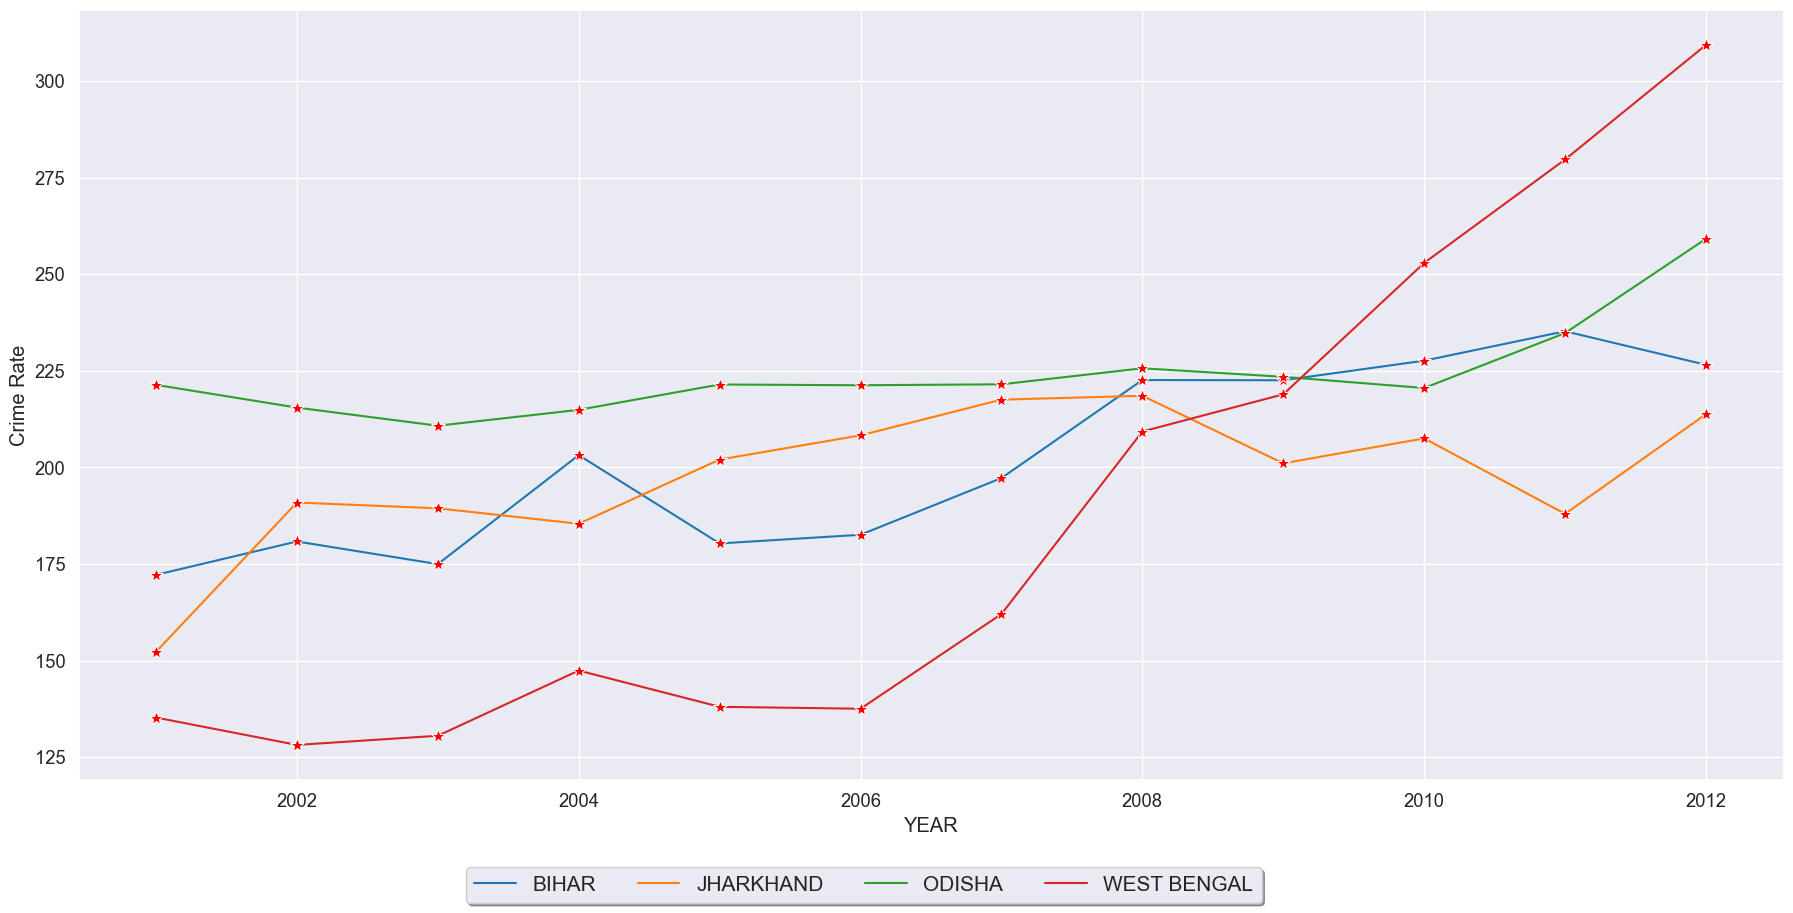

In [42]:
plt.figure(figsize=(22, 10))
sns.set(font_scale=1.2)
sns.lineplot(data=er,x='YEAR',y='Crime Rate',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
plt.show()

So in the Eastern Region Odisha was the state with the higesht crime rate till 2009 but West Bengal has been on top since 2010.

In [43]:
si5=df.set_index("Region")
cr= si5.loc[["Central"]]
cr= cr.reset_index()
cr.sample(3)

Region        STATE/UT  YEAR  POPULATION  LITERACY RATE  \
17  Central  MADHYA PRADESH  2009    68513643          69.58   
21  Central  MADHYA PRADESH  2011    70616363          69.32   
5   Central  MADHYA PRADESH  2003    62354284          65.20   

    AREA (in sq. km)  MURDER  ATTEMPT TO MURDER  \
17            308245    2386               2212   
21            308245    2511               2340   
5             308245    2227               2413   

    CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
17                                        117  2998               1   
21                                        139  3406               0   
5                                         203  2738               0   

    OTHER RAPE  KIDNAPPING & ABDUCTION  \
17        2997                    1036   
21        3406                    1288   
5         2738                     887   

    KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
17                                          841   
21                                         1088   
5                                           608   

    KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
17                                 195      117   
21                                 200      118   
5                                  279      153   

    PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
17                                   156     2270     10661  23260   
21                                   117     1952     10230  22414   
5                                    141     1578     12884  20422   

    AUTO THEFT  OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
17       10705        12555   2409                       575      1830   
21       11595        10819   2080                       557      1860   
5         5262        15160   2729                       549      1222   

    COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
17              27    741               37132           858   
21              12    784               35711           811   
5               38    868               29358           648   

    ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
17                                               6307     
21                                               6665     
5                                                6848     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
17                         728                                 3983   
21                         762                                 3732   
5                          705                                 2938   

    IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
17                                            1                         6591   
21                                           45                         7478   
5                                             0                         3778   

    OTHER IPC CRIMES  TOTAL IPC CRIMES  CRIMES AGAINST SC  CRIMES AGAINST ST  \
17            101367            207762               3040               1135   
21            112082            217094               3245               1284   
5              97751            191078               5507               1779   

    Crimes Against Women  CRIMES AGAINST CHILDREN  JUVENILES APPREHENDED  \
17                 15716                   4646.0           11056.000000   
21                 16509                   4381.0            1721.067647   
5                  14485                   2662.0           14902.000000   

    POLICEMEN KILLED ON DUTY  THEFT CASES REPOERTED  THEFT VALUE TOTAL  \
17                 29.000000                36308.0       1.008673e+09   
21                 24.082353                34714.0       1.370504e+09   
5                  29.000000                35037.0       5.731836e+08   

    TOTAL  Dacoity  TOTAL  Robbery  TOTAL  Burglary  TOTAL  Theft  \
17           

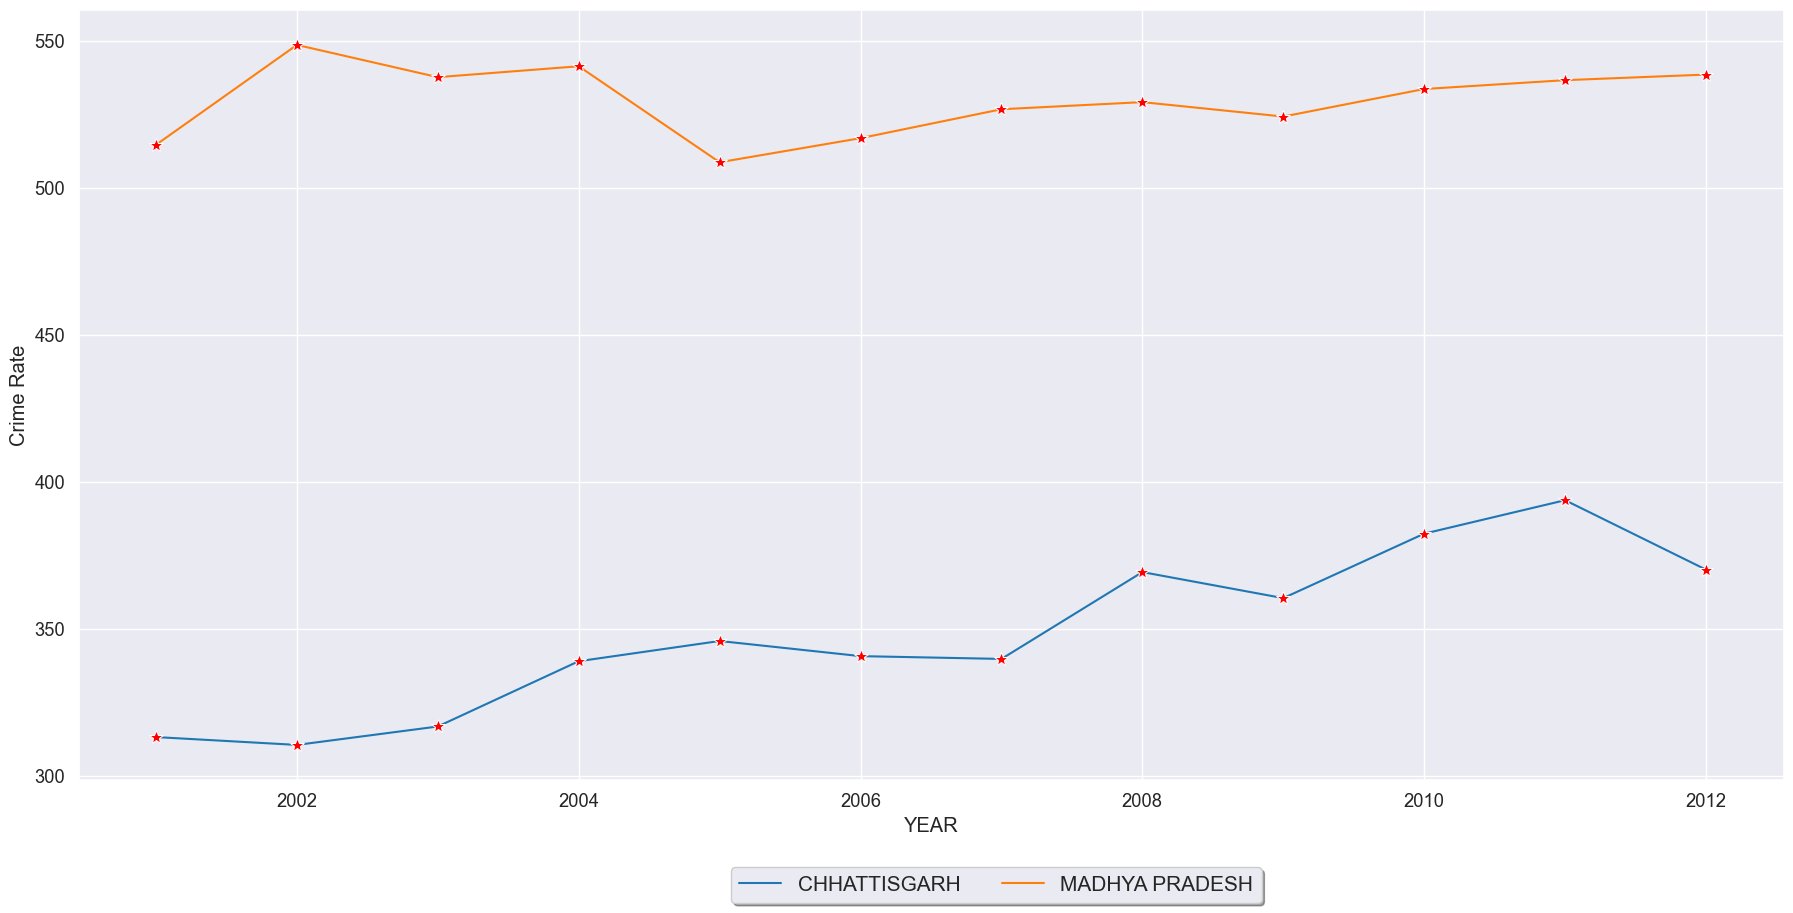

In [44]:
plt.figure(figsize=(22, 10))
sns.set(font_scale=1.2)
sns.lineplot(data=cr,x='YEAR',y='Crime Rate',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
plt.show()

So in the Central Region Madhya pradesh has been on top always.

In [45]:
si6=df.set_index("Region")
ner= si6.loc[["Northeast"]]
ner= ner.reset_index()
ner.sample(3)

Region STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
54  Northeast   SIKKIM  2007      594286      74.000000              7096   
95  Northeast  TRIPURA  2012     3675296      74.954053             10486   
63  Northeast  TRIPURA  2008     3499008      83.650000             10486   

    MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
54       9                 14                                          3   
95     124                 79                                          2   
63     155                 53                                          2   

    RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
54    24               0          24                       9   
95   229               0         229                     139   
63   204               0         204                     146   

    KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
54                                            9   
95                                          114   
63                                          110   

    KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
54                                   0        0   
95                                  25        7   
63                                  36       13   

    PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
54                                     0        6        83    118   
95                                     0       60       239    565   
63                                     3       95       218    499   

    AUTO THEFT  OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  \
54          11          107     15                         7        34   
95         140          425    128                        47       105   
63          43          456    197                        42        92   

    COUNTERFIETING  ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
54               3      1                  95             0   
95               9     59                1504            37   
63              23     47                 924            16   

    ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
54                                                 13     
95                                                314     
63                                                346     

    INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
54                           0                                    7   
95                           7                                  858   
63                           4                                  735   

    IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
54                                            0                           34   
95                                            0                           10   
63                                            0                          195   

    OTHER IPC CRIMES  TOTAL IPC CRIMES  CRIMES AGAINST SC  CRIMES AGAINST ST  \
54               192               667                 10                 13   
95              1742              6264                 76                 29   
63              1327              5336                  4                 14   

    Crimes Against Women  CRIMES AGAINST CHILDREN  JUVENILES APPREHENDED  \
54                    53                     31.0             201.000000   
95                  1559                     20.0            1721.067647   
63                  1415                    163.0             101.000000   

    POLICEMEN KILLED ON DUTY  THEFT CASES REPOERTED  THEFT VALUE TOTAL  \
54                  5.000000                  207.0          8596740.0   
95                 24.082353                  871.0         56466826.0   
63                  2.000000                  825.0         30714579.0   

    TOTAL  Dacoity  TOTAL  Robbery  TOTAL  Burglary  TOTAL  Theft  \
54             0.0             6.0             83.0         

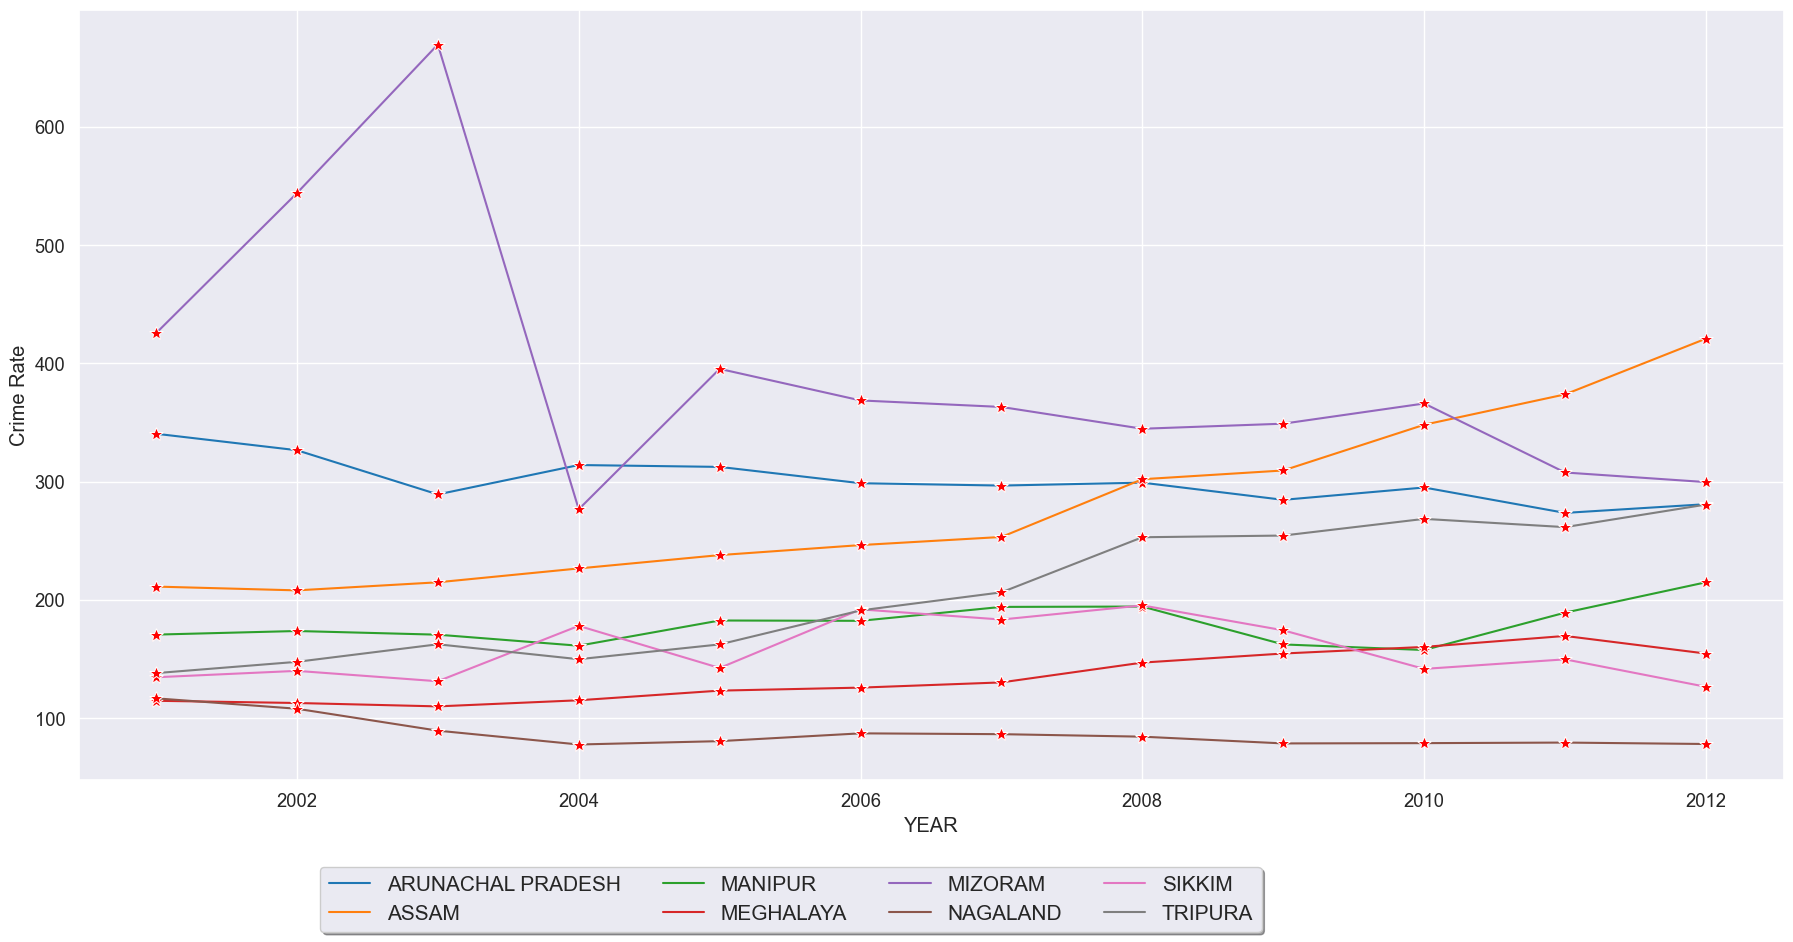

In [46]:
plt.figure(figsize=(22, 10))
sns.set(font_scale=1.2)
sns.lineplot(data=ner,x='YEAR',y='Crime Rate',hue='STATE/UT' ,marker='*',markersize=10,markerfacecolor='red',palette='tab10')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=4,fontsize=15)
plt.show()

So in the Norteastern Region Mizoram was on top till 2010 except for the year 2004 where Arunachal Pradesh had the highest crime rate but since 2011 Assam has been on top

In [47]:
df.head(2)

STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
0     ANDHRA PRADESH  2001    76210007          60.47            275045   
1  ARUNACHAL PRADESH  2001     1097968          54.34             83743   

   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
0    2602               1555                                        136   871   
1      83                 53                                          3    33   

   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0               0         871                    1182   
1               0          33                      83   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                          765   
1                                           55   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                 417      214   
1                                  28       22   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  AUTO THEFT  \
0                                     9      629      7220  16751        3051   
1                                     2       84       248    443          36   

   OTHER THEFT  RIOTS  CRIMINAL BREACH OF TRUST  CHEATING  COUNTERFIETING  \
0        13700   3001                       788      5391             144   
1          407     24                        41        30               4   

   ARSON  HURT/GREVIOUS HURT  DOWRY DEATHS  \
0    872               34947           420   
1     13                 466             0   

   ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                               3544     
1                                                 78     

   INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                        2271                                 5791   
1                           3                                   11   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            7                         7400   
1                                            0                            0   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  CRIMES AGAINST SC  CRIMES AGAINST ST  \
0             34344            130089               2933                512   
1               618              2342                  0                 72   

   Crimes Against Women  CRIMES AGAINST CHILDREN  JUVENILES APPREHENDED  \
0                 13669                    270.0                 3428.0   
1                   180                      0.0                  319.0   

   POLICEMEN KILLED ON DUTY  THEFT CASES REPOERTED  THEFT VALUE TOTAL  \
0                      70.0                24814.0        423123832.0   
1                       1.0                  797.0         25830824.0   

   TOTAL  Dacoity  TOTAL  Robbery  TOTAL  Burglary  TOTAL  Theft  \
0           214.0           629.0           7220.0       16751.0   
1            22.0            84.0            248.0         443.0   

   Human Rights Violation Cases     Region  Crime Rate  
0                            45      South      261.38  
1                            11  Northeast      340.54

# 2.4) Analysis of area vs overall crime

In [48]:
df['Total Crimes'] = df['MURDER'] + df['ATTEMPT TO MURDER'] + \
                    df['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'] + \
                    df['RAPE'] + df['CUSTODIAL RAPE'] + \
                    df['OTHER RAPE'] + df['KIDNAPPING & ABDUCTION'] + df['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'] + \
                    df['DACOITY'] + df['PREPARATION AND ASSEMBLY FOR DACOITY'] + df['ROBBERY'] + df['BURGLARY'] + \
                    df['THEFT'] + df['AUTO THEFT'] + df['OTHER THEFT'] + df['RIOTS'] + df['CRIMINAL BREACH OF TRUST'] + \
                    df['CHEATING'] + df['COUNTERFIETING'] + df['ARSON'] + df['HURT/GREVIOUS HURT'] + df['DOWRY DEATHS'] + \
                    df['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'] + df['INSULT TO MODESTY OF WOMEN'] + \
                    df['CRUELTY BY HUSBAND OR HIS RELATIVES'] + df['IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES'] + \
                    df['CAUSING DEATH BY NEGLIGENCE'] + df['OTHER IPC CRIMES'] + df['TOTAL IPC CRIMES']


In [49]:
df.head(10)

STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
0     ANDHRA PRADESH  2001    76210007          60.47            275045   
1  ARUNACHAL PRADESH  2001     1097968          54.34             83743   
2              ASSAM  2001    26655528          63.25             78438   
3              BIHAR  2001    82998509          47.00             94163   
4       CHHATTISGARH  2001    20733232          64.66            135191   
5                GOA  2001     1347668          82.01              3702   
6            GUJARAT  2001    50579626          69.14            196024   
7            HARYANA  2001    21144564          67.91             44212   
8   HIMACHAL PRADESH  2001     6077900          76.48             55673   
9    JAMMU & KASHMIR  2001    10143700          55.52            222236   

   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
0    2602               1555                                        136   871   
1      83                 53                                          3    33   
2    1356                481                                         40   817   
3    3643               3419                                        250   888   
4     880                529                                         45   959   
5      36                 30                                          5    12   
6    1226                537                                         94   286   
7     781                467                                         78   398   
8     119                 75                                         11   124   
9    1075               1474                                         33   169   

   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0               0         871                    1182   
1               0          33                      83   
2               0         817                    1480   
3               0         888                    2159   
4               0         959                     207   
5               0          12                       9   
6               0         286                     998   
7               0         398                     449   
8               0         124                     126   
9               0         169                     606   

   KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                          765   
1                                           55   
2                                         1070   
3                                          518   
4                                          171   
5                                            6   
6                                          857   
7                                          297   
8                                          105   
9                                          504   

   KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                 417      214   
1                                  28       22   
2                                 410      532   
3                                1641     1291   
4                                  36       87   
5                                   3        7   
6                                 141      327   
7                                 152       77   
8                                  21        4   
9                                 102       24   

   PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  AUTO THEFT  \
0                                     9      629      7220  16751        3051   
1                                     2       84       248    443          36   
2                                    14      687      2423   5367         350   
3                                   147     2203      3233   9701        1050   
4                                    19      338      4144   4812         920   
5                                     0       25       359    576         168 

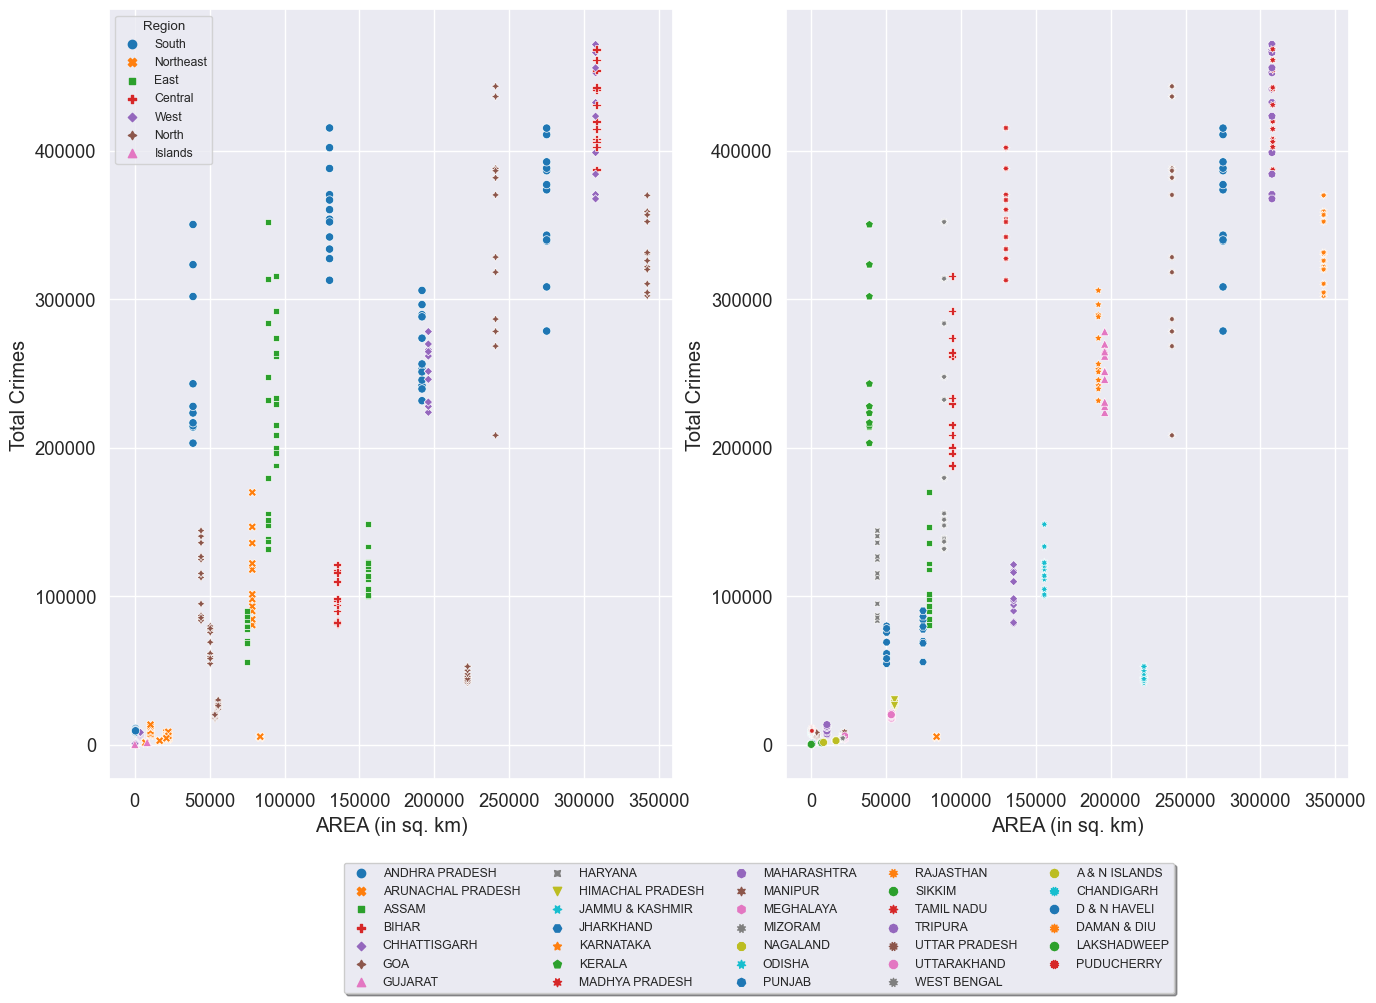

In [50]:
fig,axes = plt.subplots(1,2, figsize=(16,10))
sns.set(font_scale=0.8)
sns.scatterplot(ax=axes[0],x='AREA (in sq. km)',y='Total Crimes',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='AREA (in sq. km)',y='Total Crimes',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

*States/UT with small AREAS have less TOTAL CRIMES.

*States/UT with large AREAS have more TOTAL CRIMES.

# 2.5) Analysis of Population vs overall Crime

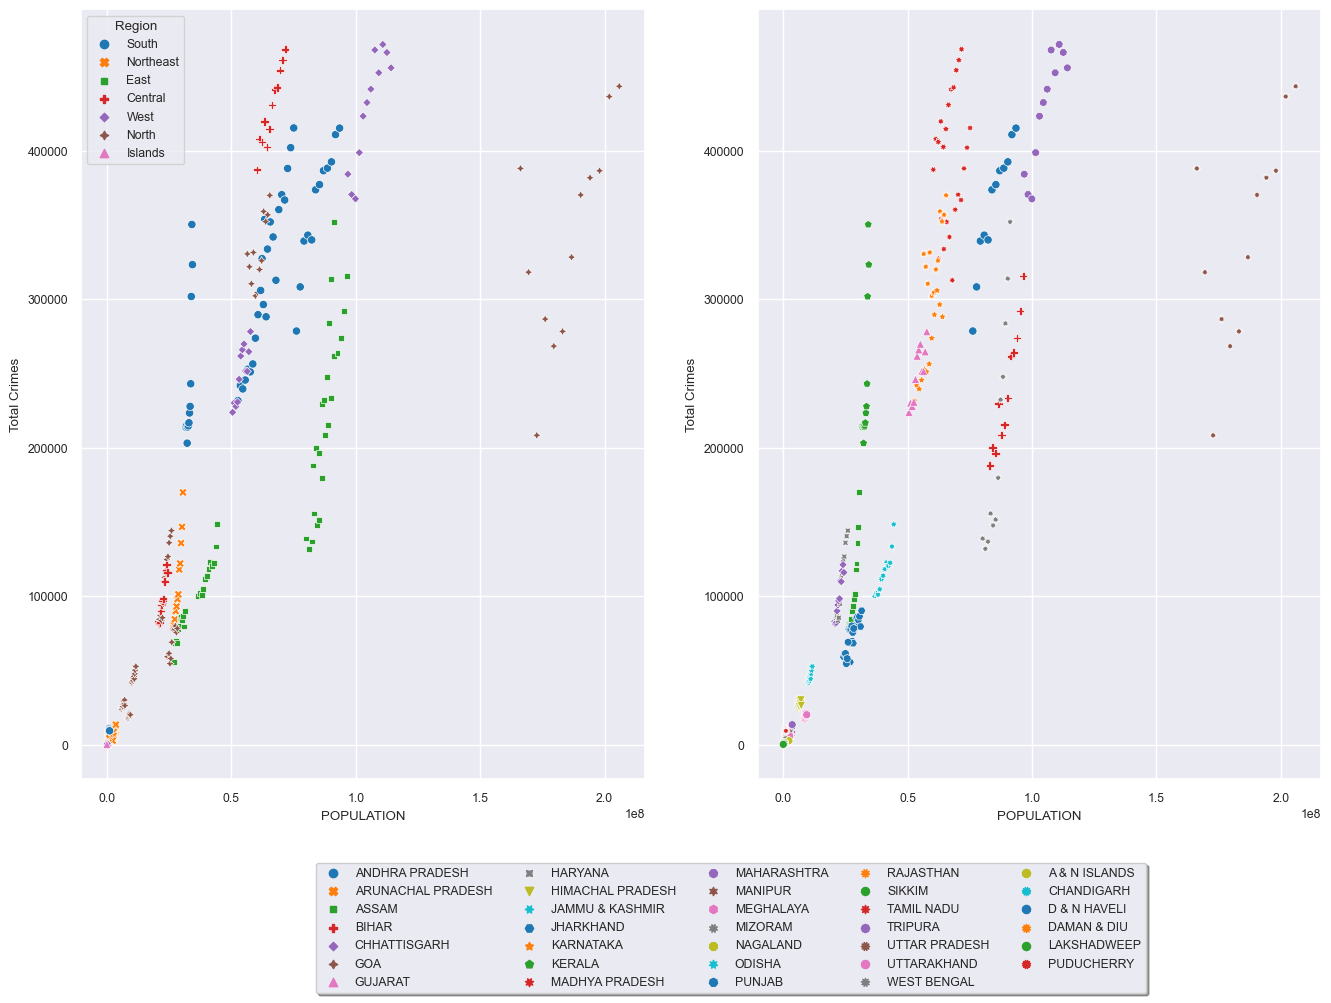

In [51]:
fig,axes = plt.subplots(1,2, figsize=(16,10))
sns.set(font_scale=0.8)
sns.scatterplot(ax=axes[0],x='POPULATION',y='Total Crimes',data=df,hue='Region',palette='tab10',style='Region')
sns.scatterplot(ax=axes[1],x='POPULATION',y='Total Crimes',data=df,hue='STATE/UT',palette='tab10',style='STATE/UT')
plt.legend(loc='upper right', bbox_to_anchor=(0.7, -0.1),
          fancybox=True, shadow=True, ncol=5)

# 2.6) Each state crime report

#### We will make 4 graphs for analysing Total crimes, Total Ipc crimes, Total Theft and the overall crime rate for making the report

<AxesSubplot:xlabel='STATE/UT,Total Crimes'>

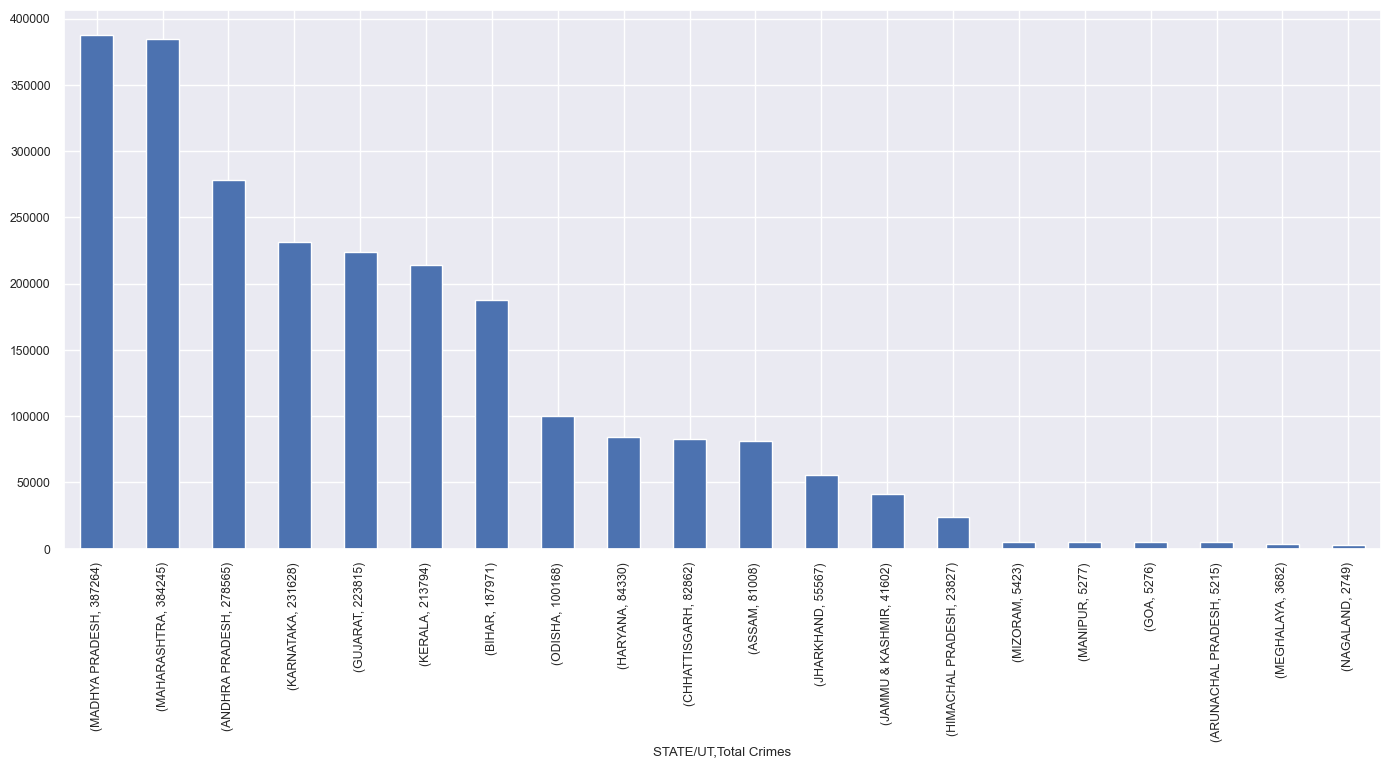

In [52]:
s=df[:20]
s.groupby('STATE/UT')["Total Crimes"].sum()
plt.figure(figsize=(17,7))
s.groupby(['STATE/UT',"Total Crimes"])["Total Crimes"].sum().sort_values(ascending=False).plot.bar()

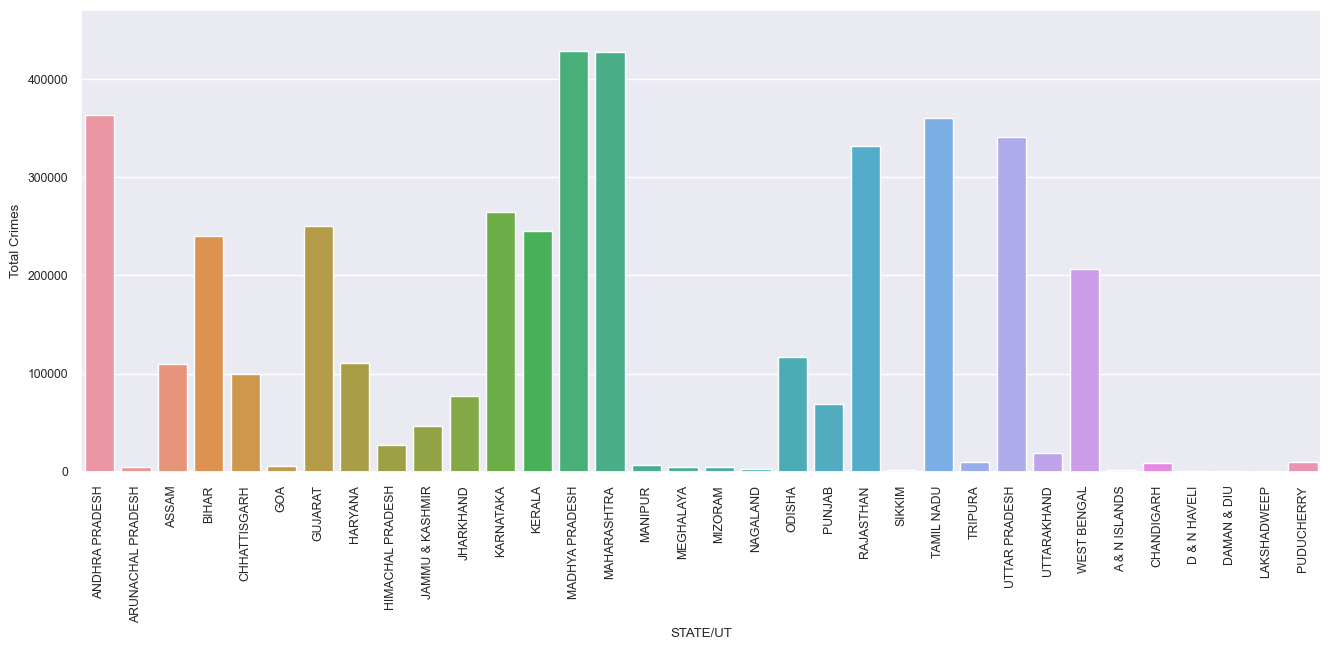

In [53]:
plt.figure(figsize=(16,6))
sns.barplot(x='STATE/UT', y='Total Crimes',data=df,errwidth=0)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='STATE/UT,TOTAL IPC CRIMES'>

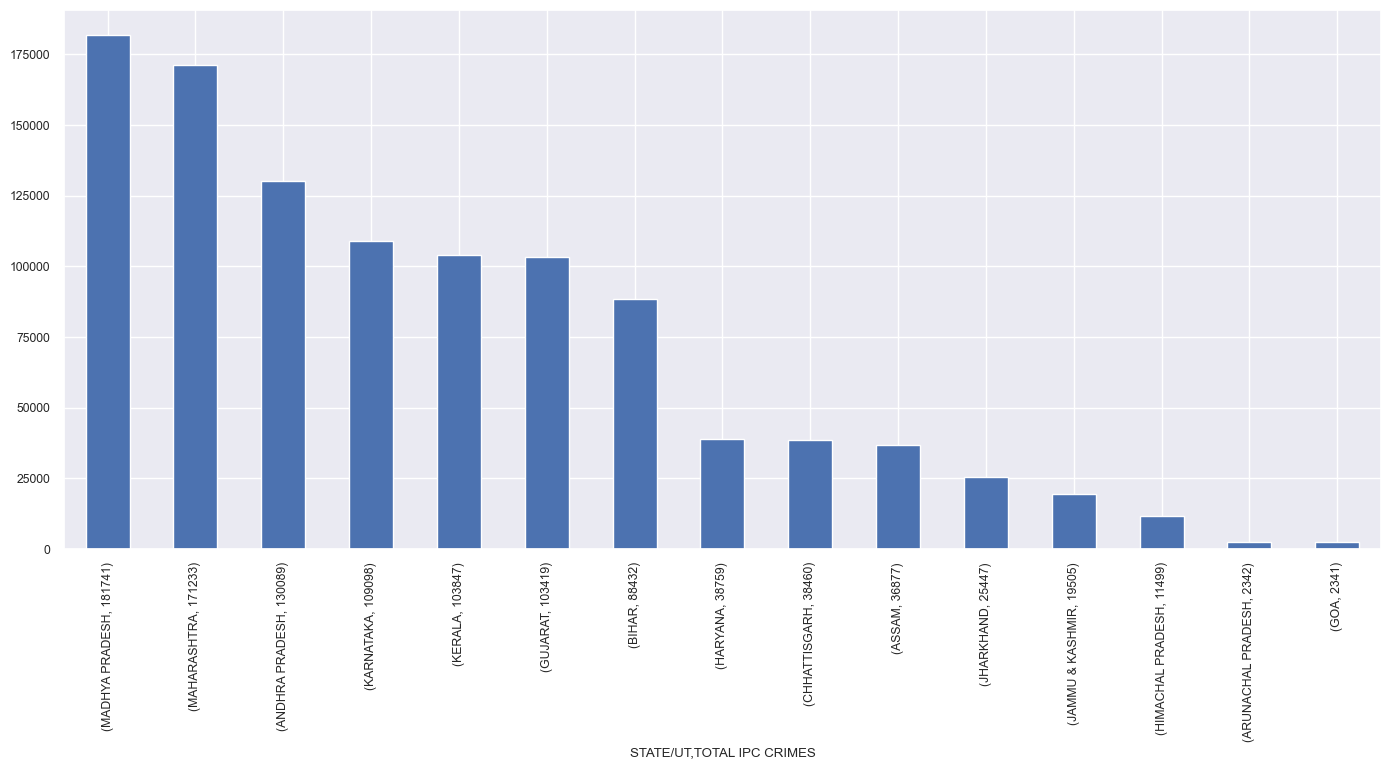

In [54]:
s=df[:15]
s.groupby('STATE/UT')["TOTAL IPC CRIMES"].sum()
plt.figure(figsize=(17,7))
s.groupby(['STATE/UT',"TOTAL IPC CRIMES"])["TOTAL IPC CRIMES"].sum().sort_values(ascending=False).plot.bar()

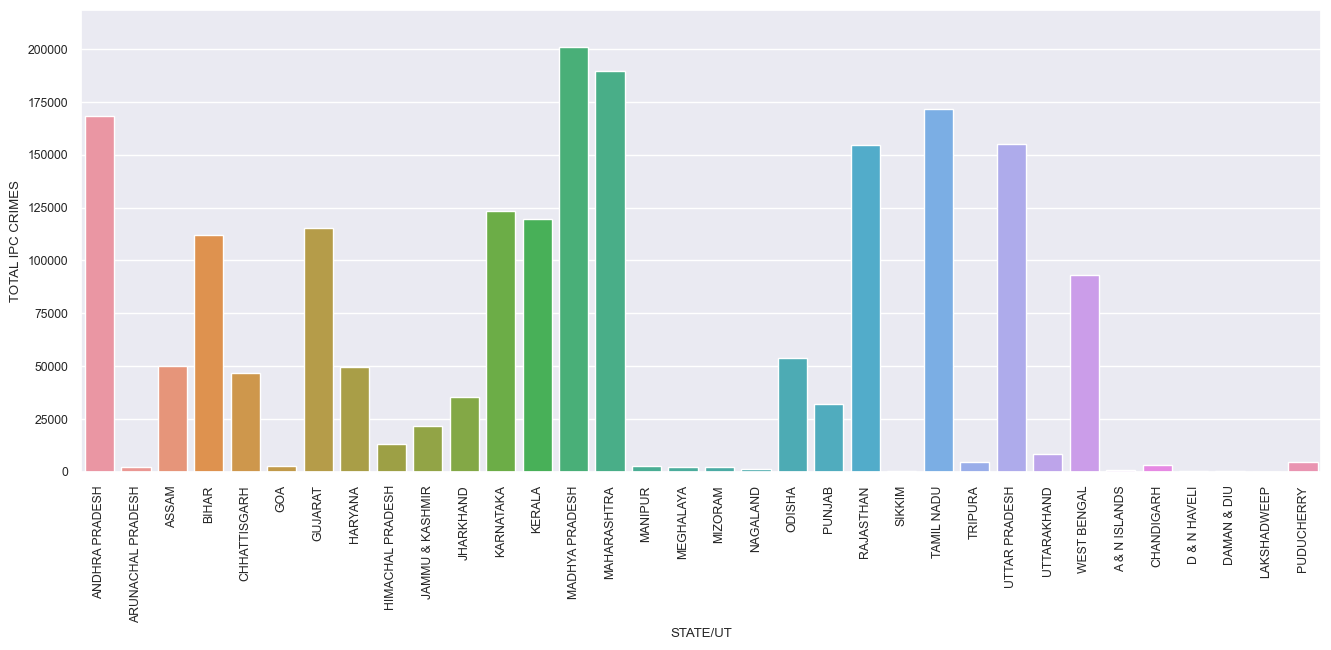

In [55]:
plt.figure(figsize=(16,6))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=df,errwidth=0)
plt.xticks(rotation=90)
plt.show()

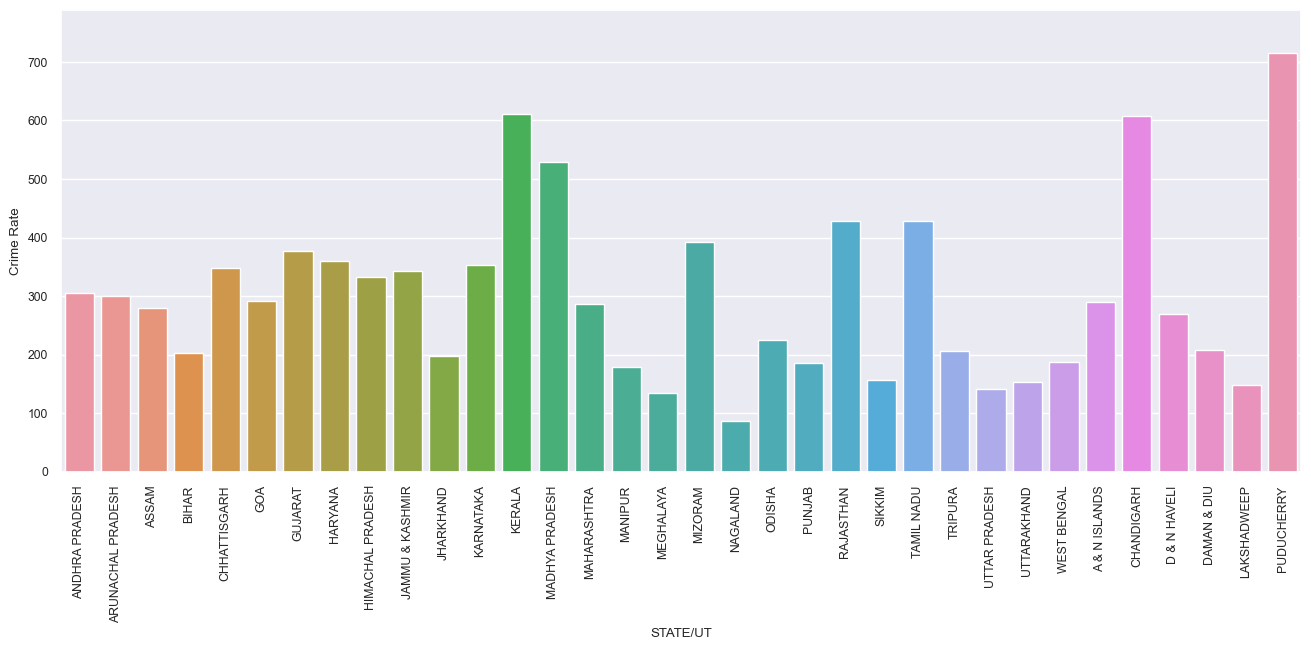

In [56]:
plt.figure(figsize=(16,6))
sns.barplot(x='STATE/UT', y='Crime Rate',data=df,errwidth=0)
plt.xticks(rotation=90)
plt.show()

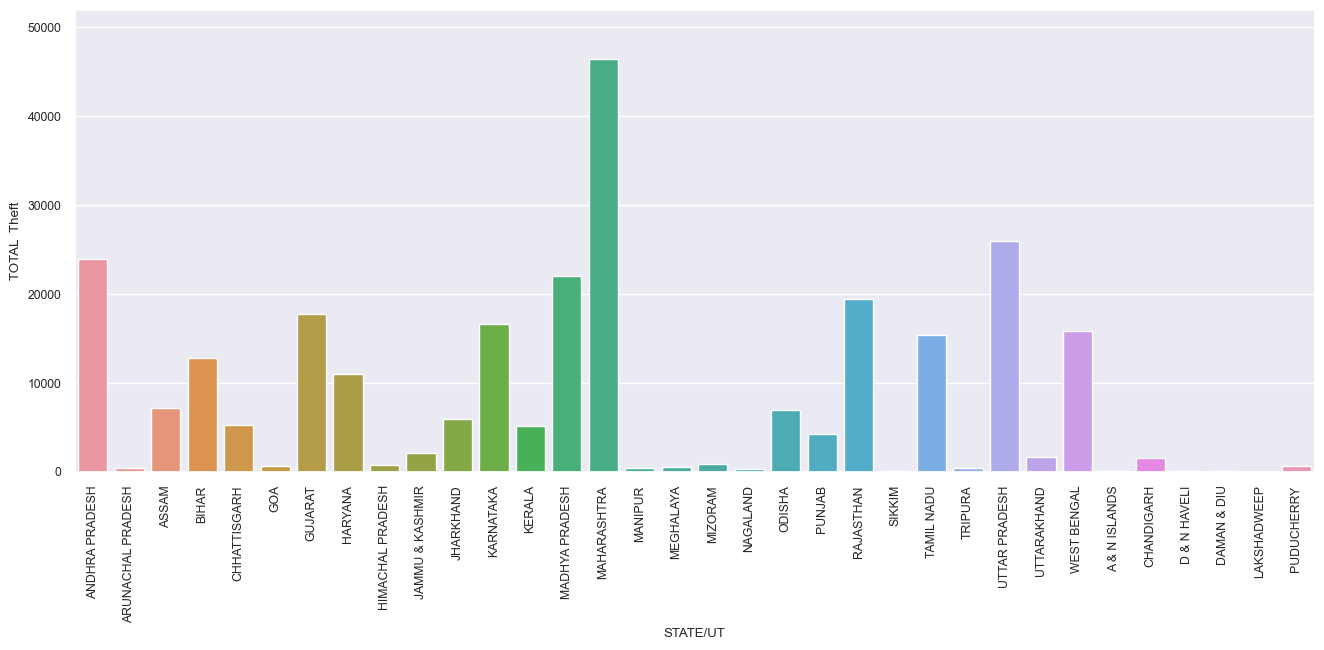

In [57]:
plt.figure(figsize=(16,6))
sns.barplot(x='STATE/UT', y='TOTAL  Theft',data=df,errwidth=0)
plt.xticks(rotation=90)
plt.show()

- A& N ISLANDS- Andaman & Nicobar Island has very low Total crimes and Total IPC crimes.Crime rate were the lowest in the year 2002 and highest in 2012.But overal the crime rate is low.

- ANDHRA PRADESH- Total crimes are high and Total Ipc crimes are also high. crime rate was the lowest in 2001 and highest in 2012. Its also one of the **top states in crimes like Creulty by husband and hurt/grevious hurt**.

- ARUNACHAL PRADESH- Total crimes and Total Ipc crimes both are low. Crime rate of ARUNACHAL PRADESH were highest in year 2001 and lowest in year 2011. 

- ASSAM- Crime rates of ASSAM were the lowest in 2002 and highest in yeasr 2012. The Crime rate is increasing continuously.

- BIHAR- The Total Crimes and Total IPC crimes of BIHAR are moderate. The crime rate is also moderate, it was the lowest in 2001 and highest in 2012. After hitting the high crime rate in year 2004,the crime rates desreased in the yeart 2005, but after that, the crime rates are increasing continuously.Its also one of the **top states in crimes like Dacoity, Riots, Dowry Deaths, Kidnapping and Murders.**

- CHANDIGARH- The total crimes and Total IPC crimes of CHANDIGARH is low. CHANDIGARH'S crime rate hit the highest in 2002 and lowest in year 2003.

- CHHATTISGARH-With low total crimes and low Total IPC crimes, It has low crime rate which was lowest in 2003 and highest in the year 2011.

- D & N HAVELI- Being a UT with an area of 491 km2, It has very low total crimes and very low total IPC crimes.

- DAMAN & DIU- Its also an UT near Gujrat, crime rate of DAMAN & DIU were highest in 2005 and lowest in 2012. The crime rates are decreasing since 2009.

- DELHI – The Capital of India , Delhi has low total IPC crimes, the The peak of crime rates in DELHI were in 2001 and hit the lowest in the year 2008. 

- GOA- Goa has low crime rate. Crime rates were the lowest in 2005 and highest in 2012. The crime rate were increasing continuously since 2005.

- GUJARAT – Total IPC crimes and Total crimes are high. Crime rate was the highest in the year 2007 and lowest in the year 2010.

- HARYANA – It has less Total IPC crimes and Total crimes compared to Gujrat. But it's crime rate is increasing continuously.

- HIMACHAL PRADESH – Highest crime rate of HIMACHAL PRADESH was in year 2007 and lowest in 2012. The crime rate is decreasing.

- JAMMU & KASHMIR – The crime rate is low of JAMMU & KASHMIR, but one of the states with highest cases of **Kidnapping.**

- JHARKHAND – Crime rate of the state JHARKHAND was lowest in 2001 and highest in 2007, the crime rate is declining since 2007.

- KARNATAKA -Karnataka has high Total IPC crime and Total crimes.

- KERALA – Crime rate was the lowest in year 2003 and highest ion 2011 and are decreasing after 2011. it is the no.1 literacy state of india. Was on of the states with **highest cases of other IPC crimes** also one of the highest cases of **Riots**

- LAKSHADWEEP – It has the **lowest crimes.** It is a small state whose crime rate was lowest in 2003 and highest in 2009. Its the State/UT with the lowest area.

- MADHYA PRADESH – It has the **highest total IPC crimes and total crimes**. MADHYA PRADESH's crime rate was the highest in 2001 and has been low since then. Was on of the states with **highest cases of other IPC crimes** and one of the top states in cases like **Hurt/Grevious hurt and Rapes.**

- MAHARASHTRA – It has the **2nd highest Total IPC crimes and total crimes**. Also, it has the **highest crime rate.** Its the state with **most cases of Rape and Theft.**

- MANIPUR- It is a state with very low total crimes. The crime rate of MANIPUR are sometimes high, sometimes low. Crime rate was highest in year 2008 and lowest in 2010. It is less populated.

- MEGHALAYA – MEGHALAYA's total crimes are also very low with one of the lowest crime rates. me rate of MEGHALAYA was lowest in 2003 and highest in 2011 and is decreasing since then.

- MIZORAM – It also has a less crime rate. MIZORAM's crime rate was the highest in 2003 and lowest in 2004.

- NAGALAND – The north-eastern state with the **lowest crime rate**.Crime rate of NAGALAND was lowest in 2003 and highest in 2008 and after 2008, the crime rate is gradually decreasing.

- ODISHA – The total IPC crimes and Total crimes are low, 647946 crimes were happened in the duration of 11 years. Crime rate of ODISHA was the lowest in 2003 and highest in 2012. 

- PUDUCHERRY- PUDUCHERRy also has a very low crime rate. Crime rate of PUDUCHERRY was highest in 2007 and lowest in 2010.

- PUNJAB - The total crimes are low of this state. PUNJAB's crime rate was lowest in 2004 and highest in 2007.

- RAJASTHAN- It has high Total IPC crimes and total crimes.Crime rate of the state RAJASTHAN was highest in 2001 and lowest in 2006. it is the **largest state of India** in terms of area. Also one of the states with **high number of cases of cruelty by husband and cheating**

- SIKKIM- SIKKIM has one of the lowest Total crimes and total IPC crimes. The crime rate is also very low. Crime rate of SIKKIM was lowest in 2003 and highest in 2008.

- TAMIL NADU – Tamil nadu has very high total crimes. Crime rate of TAMIL NADU was the lowest in 2006 and highest in 2012. Was on of the states with **highest cases of other IPC crimes** and the state with highest cases of **Counterfieting.**

- TRIPURA – IT has one of the lowest crime rates in India.

- UTTAR PRADESH- With high total IPC crimes and Total crimes, it is the **most populated state** of India. Crime rate is low,Crime Rate of UTTAR PRADESH was highest in 2001 and lowest in 2003, and the state with high number of cases of **DOwry death, kidnapping, theft and murders**

- UTTARAKHAND – Very low total IPC crimes and total crimes. the crime rate is also very low which peaked in the year 2007 and hit the lowest in 2011.

- WEST BENGAL- It has moderate total crimes and total IPC crimes. Crime rate of WEST BENGAL is increasing continuously since 2005. It was the lowest in 2002 and highest in 2012. Its also **one of the states with highest number of rape cases reported**

In [58]:
df

STATE/UT  YEAR  POPULATION  LITERACY RATE  AREA (in sq. km)  \
0       ANDHRA PRADESH  2001    76210007      60.470000            275045   
1    ARUNACHAL PRADESH  2001     1097968      54.340000             83743   
2                ASSAM  2001    26655528      63.250000             78438   
3                BIHAR  2001    82998509      47.000000             94163   
4         CHHATTISGARH  2001    20733232      64.660000            135191   
..                 ...   ...         ...            ...               ...   
403         CHANDIGARH  2012     1144839      86.050000               114   
404       D & N HAVELI  2012      259148      74.954053               491   
405        DAMAN & DIU  2012      191924      74.954053               112   
406        LAKSHADWEEP  2012       74578      74.954053                32   
407         PUDUCHERRY  2012     1148900      74.954053               479   

     MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0      2602               1555                                        136   
1        83                 53                                          3   
2      1356                481                                         40   
3      3643               3419                                        250   
4       880                529                                         45   
..      ...                ...                                        ...   
403      21                 44                                          5   
404       7                  2                                          0   
405       3                  5                                          0   
406       0                  0                                          0   
407      29                 27                                         12   

     RAPE  CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
0     871               0         871                    1182   
1      33               0          33                      83   
2     817               0         817                    1480   
3     888               0         888                    2159   
4     959               0         959                     207   
..    ...             ...         ...                     ...   
403    27               0          27                      87   
404     3               0           3                      13   
405     5               0           5                       3   
406     0               0           0                       0   
407    13               0          13                      19   

     KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                            765   
1                                             55   
2                                           1070   
3                                            518   
4                                            171   
..                                           ...   
403                                           66   
404                                            9   
405                                            0   
406                                            0   
407                                           16   

     KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  \
0                                   417      214   
1                                    28       22   
2                                   410      532   
3                                  1641     1291   
4                                    36       87   
..                                  ...      ...   
403                                  21        3   
404                                   4        2   
405                                   3        1   
406                                   0        0   
407                                   3        5   

     PREPARATION AND ASSEMBLY FOR DACOITY  ROBBERY  BURGLARY  THEFT  \
0                                       9      629      7220  

In [59]:
df.to_csv('phase-2 total crime report.csv', index=False)